In [2]:
import datetime
import os
import glob
import gc
import pandas as pd
import xarray as xr
import numpy as np
import geopandas as gpd

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib import colors

plt.style.use('science.mplstyle')
projectdir = '/glade/campaign/uwyo/wyom0112/berkeley/'

In [3]:
## fig 1 data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
huc2 = gpd.read_file(f'{projectdir}/fos-data/spatialdata/huc2.shp')
huc6 = gpd.read_file(f'{projectdir}/fos-data/spatialdata/huc6.shp')
metapath = '/glade/campaign/uwyo/wyom0112/postprocess/meta/meta_new/'
coords1 = xr.open_dataset('/glade/campaign/uwyo/wyom0112/postprocess/meta/meta_new/wrfinput_d01')
coords2 = xr.open_dataset('/glade/campaign/uwyo/wyom0112/postprocess/meta/meta_new/wrfinput_d02')
coords4 = xr.open_dataset('/glade/campaign/uwyo/wyom0112/postprocess/meta/meta_new/wrfinput_d04')
coords3 = xr.open_dataset('/glade/campaign/uwyo/wyom0112/postprocess/meta/meta_new/wrfinput_d03')
coords_dict = {'d01': coords1, 
               'd02': coords2,
               'd03': coords3,
               'd04': coords4}

Figure 2
A time series of the SWE trend in the different domains, both bias corrected and not bias correctedfrom scipy.stats import theilslopes


In [7]:
from scipy.stats import theilslopes
from myfunctions import _wrfread, _wrfread_gcm, _read_merge, _metaread

/glade/u/home/mcowherd/snow_drought/downscaling/myfunctions.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [5]:

gcms = ['cesm2','mpi-esm1-2-lr','cnrm-esm2-1',
        'ec-earth3-veg','fgoals-g3','ukesm1-0-ll',
        'canesm5','access-cm2','ec-earth3']
variants = ['r11i1p1f1','r7i1p1f1','r1i1p1f2',
            'r1i1p1f1','r1i1p1f1','r2i1p1f2',
            'r1i1p2f1','r5i1p1f1','r1i1p1f1',]

calendar = ['365_day','proleptic_gregorian','proleptic_gregorian',
            'proleptic_gregorian','365_day','360_day',
             '365_day','proleptic_gregorian','proleptic_gregorian',]

ssps = ['ssp370','ssp370','ssp370','ssp370',
        'ssp370','ssp370','ssp370','ssp370',
        'ssp370','ssp370','ssp370','ssp370',]

savepath = '/glade/campaign/uwyo/wyom0112/berkeley/'
dir_meta = "/glade/campaign/uwyo/wyom0112/postprocess/meta/meta_new/"
domains = ['d01', 'd02', 'd03','d04']

In [6]:
date_start_hist, date_end_hist = "1980-09-01", "2014-08-31"
date_start_ssp, date_end_ssp = "2014-09-01", "2100-08-31"

p = np.array([1000, 925, 850, 800, 700, 600, 500, 400, 300, 250])
pressure = xr.DataArray(p,dims=['pressure'])

datadir = "/glade/campaign/uwyo/wyom0112/postprocess"

snow_noBC = {}
snow_BC = {}
snowmax_noBC = {}
snowmax_BC = {}

keys = []

for count, igcm in enumerate(gcms):
    for domain in domains:
        lat1, lon1, z1, file = _metaread(dir_meta,domain)
        lon_wrf = lon1[0,:,:]
        lat_wrf = lat1[0,:,:]
        z_wrf = z1[0,:,:]
        lat_wrf = xr.DataArray(lat_wrf, dims=["lat2d", "lon2d"])
        lon_wrf = xr.DataArray(lon_wrf, dims=["lat2d", "lon2d"])
        z_wrf = xr.DataArray(z_wrf, dims=["lat2d", "lon2d"])

        coords = {'lat': (['lat2d','lon2d'], lat_wrf), \
                 'lon': (['lat2d','lon2d'], lon_wrf) }

        
        condition = ()

        bc = False
        var = 'snow'
        key = '%s_%s_%s_%s' %(igcm,variants[count],ssps[count],domain)
        try:
            var_read = _read_merge(datadir,domain,var,
                                igcm,variants[count], \
                                date_start_hist,date_start_ssp, \
                                date_end_hist,date_end_ssp,ssps[count],bc,
                    calendar[count])
            snow_noBC[key] = var_read

            var_x = var_read.groupby(var_read.time.dt.year).max(dim = 'time').sum(dim = 'lat2d').sum(dim = 'lon2d')
            #var_x['time'] = np.arange(1981,2101)
            snowmax_noBC[key] = var_x


            bc = True

            var_read = _read_merge(datadir,domain,var,
                                igcm,variants[count], \
                                date_start_hist,date_start_ssp, \
                                date_end_hist,date_end_ssp,ssps[count],bc,calendar[count])#

            snow_BC[key] = var_read

            var_x = var_read.groupby(var_read.time.dt.year).max(dim = 'time').sum(dim = 'lat2d').sum(dim = 'lon2d')
            #var_x['time'] = np.arange(1981,2101)
            snowmax_BC[key] = var_x
        except:
            if domain == 'd03': continue
            elif domain == 'd04': continue
            else: print(domain)

gc.collect()

365_day 2014-08-31 2100-08-31
cesm2 r11i1p1f1 False ssp370
365_day 2014-08-31 2100-08-31
cesm2 r11i1p1f1 True ssp370
365_day 2014-08-31 2100-08-31
cesm2 r11i1p1f1 False ssp370
365_day 2014-08-31 2100-08-31
cesm2 r11i1p1f1 True ssp370
365_day 2014-08-31 2100-08-31
cesm2 r11i1p1f1 False ssp370
365_day 2014-08-31 2100-08-31
365_day 2014-08-31 2100-08-31
cesm2 r11i1p1f1 False ssp370
365_day 2014-08-31 2100-08-31
proleptic_gregorian 2014-08-31 2100-08-31
mpi-esm1-2-lr r7i1p1f1 False ssp370
proleptic_gregorian 2014-08-31 2100-08-31
mpi-esm1-2-lr r7i1p1f1 True ssp370
proleptic_gregorian 2014-08-31 2100-08-31
mpi-esm1-2-lr r7i1p1f1 False ssp370
proleptic_gregorian 2014-08-31 2100-08-31
mpi-esm1-2-lr r7i1p1f1 True ssp370
proleptic_gregorian 2014-08-31 2100-08-31
proleptic_gregorian 2014-08-31 2100-08-31
proleptic_gregorian 2014-08-31 2100-08-31
cnrm-esm2-1 r1i1p1f2 False ssp370
proleptic_gregorian 2014-08-31 2100-08-31
cnrm-esm2-1 r1i1p1f2 True ssp370
proleptic_gregorian 2014-08-31 2100-08-31
c

2808

In [7]:
np.save('snowmax_BC.npy', snowmax_BC) 
np.save('snowmax_noBC.npy', snowmax_noBC)

d01
d02
d03
d04


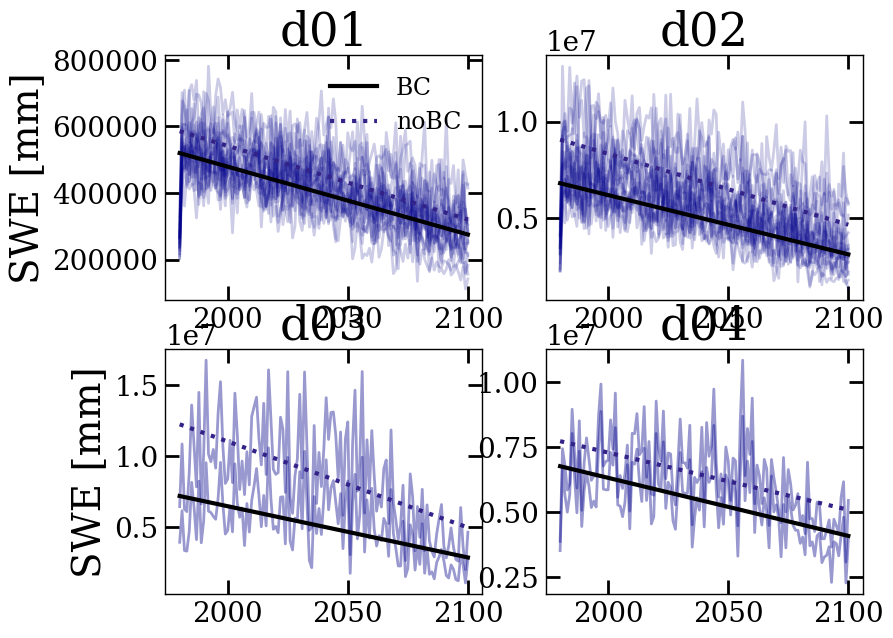

In [8]:
styles = {'BC':['-','black'],
          'noBC': [':', 'darkblue'],
          'd01': 0.2,
          'd02': 0.2,
          'd03':0.4,
          'd04':0.4
         }
from scipy.stats import theilslopes

x = np.arange(121)
years = range(1980,2101)
fig, ax = plt.subplots(2,2)
axs = ax.flatten()
keys = list(snowmax_BC.keys())
lines_noBC = {}
lines_BC = {}
for i, domain in enumerate(domains):
    myax = axs[i]
    mydata_BC = []
    mydata_noBC = []
    for key in keys:
        if domain in key:
            ts = snowmax_BC[key]
            myax.plot(years, ts, alpha = styles[domain], color = styles['BC'][1])
            mydata_BC.append(ts)
            ts = snowmax_noBC[key]
            myax.plot(years, ts, alpha = styles[domain], color = styles['noBC'][1])
            mydata_noBC.append(ts)
    allmydata = np.nanmean(np.array(mydata_BC), axis = 0)
    slope, intercept, lowslope, highslope = theilslopes(allmydata, x)
    trendline = intercept + slope * x
    lines_BC[domain] = trendline
    myax.plot(x+1980, trendline, linestyle = styles['BC'][0], label = 'BC', linewidth = 3)
    allmydata = np.nanmean(np.array(mydata_noBC), axis = 0)
    slope, intercept, lowslope, highslope = theilslopes(allmydata, x)
    trendline = intercept + slope * x
    lines_noBC[domain] = trendline
    myax.plot(x+1980, trendline, linestyle = styles['noBC'][0], label = 'noBC', linewidth = 3)
    myax.set_title(domain)
    print(domain)
    if i %2 == 0: myax.set_ylabel(r'SWE [mm]')
    if i == 0: myax.legend()
plt.show()
np.save('lines_BC.npy', lines_BC) 
np.save('lines_noBC.npy', lines_noBC)

In [6]:

kwargs = {'frameon':True,
         'xticklabels': [],
         'yticklabels': []}

styles = {'BC':['-','black'],
          'noBC': ['--', 'darkblue'],
          'd01': 0.1,
          'd02': 0.1,
          'd03':0.4,
          'd04':0.4
         }
lines_BC = np.load('lines_BC.npy', allow_pickle = True).flatten()[0]
lines_noBC = np.load('lines_noBC.npy', allow_pickle = True).flatten()[0]
snowmax_BC = np.load('snowmax_BC.npy',allow_pickle = True).flatten()[0] #, snowmax_BC) 
snowmax_noBC = np.load('snowmax_noBC.npy', allow_pickle = True).flatten()[0]#, snowmax_noBC)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

x = np.arange(121)
years = range(1980,2101)


In [7]:
snowmaxkeys = {'d01':['cesm2_r11i1p1f1_ssp370_d01',
                     'mpi-esm1-2-lr_r7i1p1f1_ssp370_d01',
                     'cnrm-esm2-1_r1i1p1f2_ssp370_d01',
                     'ec-earth3-veg_r1i1p1f1_ssp370_d01',
                    'fgoals-g3_r1i1p1f1_ssp370_d01',
                     'ukesm1-0-ll_r2i1p1f2_ssp370_d01',
                     'canesm5_r1i1p2f1_ssp370_d01', 
                     'access-cm2_r5i1p1f1_ssp370_d01',
                     'ec-earth3_r1i1p1f1_ssp370_d01',],
               'd02':['cesm2_r11i1p1f1_ssp370_d02',
                     'mpi-esm1-2-lr_r7i1p1f1_ssp370_d02',
                     'cnrm-esm2-1_r1i1p1f2_ssp370_d02',
                    'ec-earth3-veg_r1i1p1f1_ssp370_d02',
                      'fgoals-g3_r1i1p1f1_ssp370_d02',
                      'ukesm1-0-ll_r2i1p1f2_ssp370_d02',
                      'canesm5_r1i1p2f1_ssp370_d02',
                      'access-cm2_r5i1p1f1_ssp370_d02',
                      'ec-earth3_r1i1p1f1_ssp370_d02'],
               'd03':[ 'ec-earth3-veg_r1i1p1f1_ssp370_d03', ],
               'd04': ['ec-earth3-veg_r1i1p1f1_ssp370_d04',]
              }

d01
d02
d03
d04


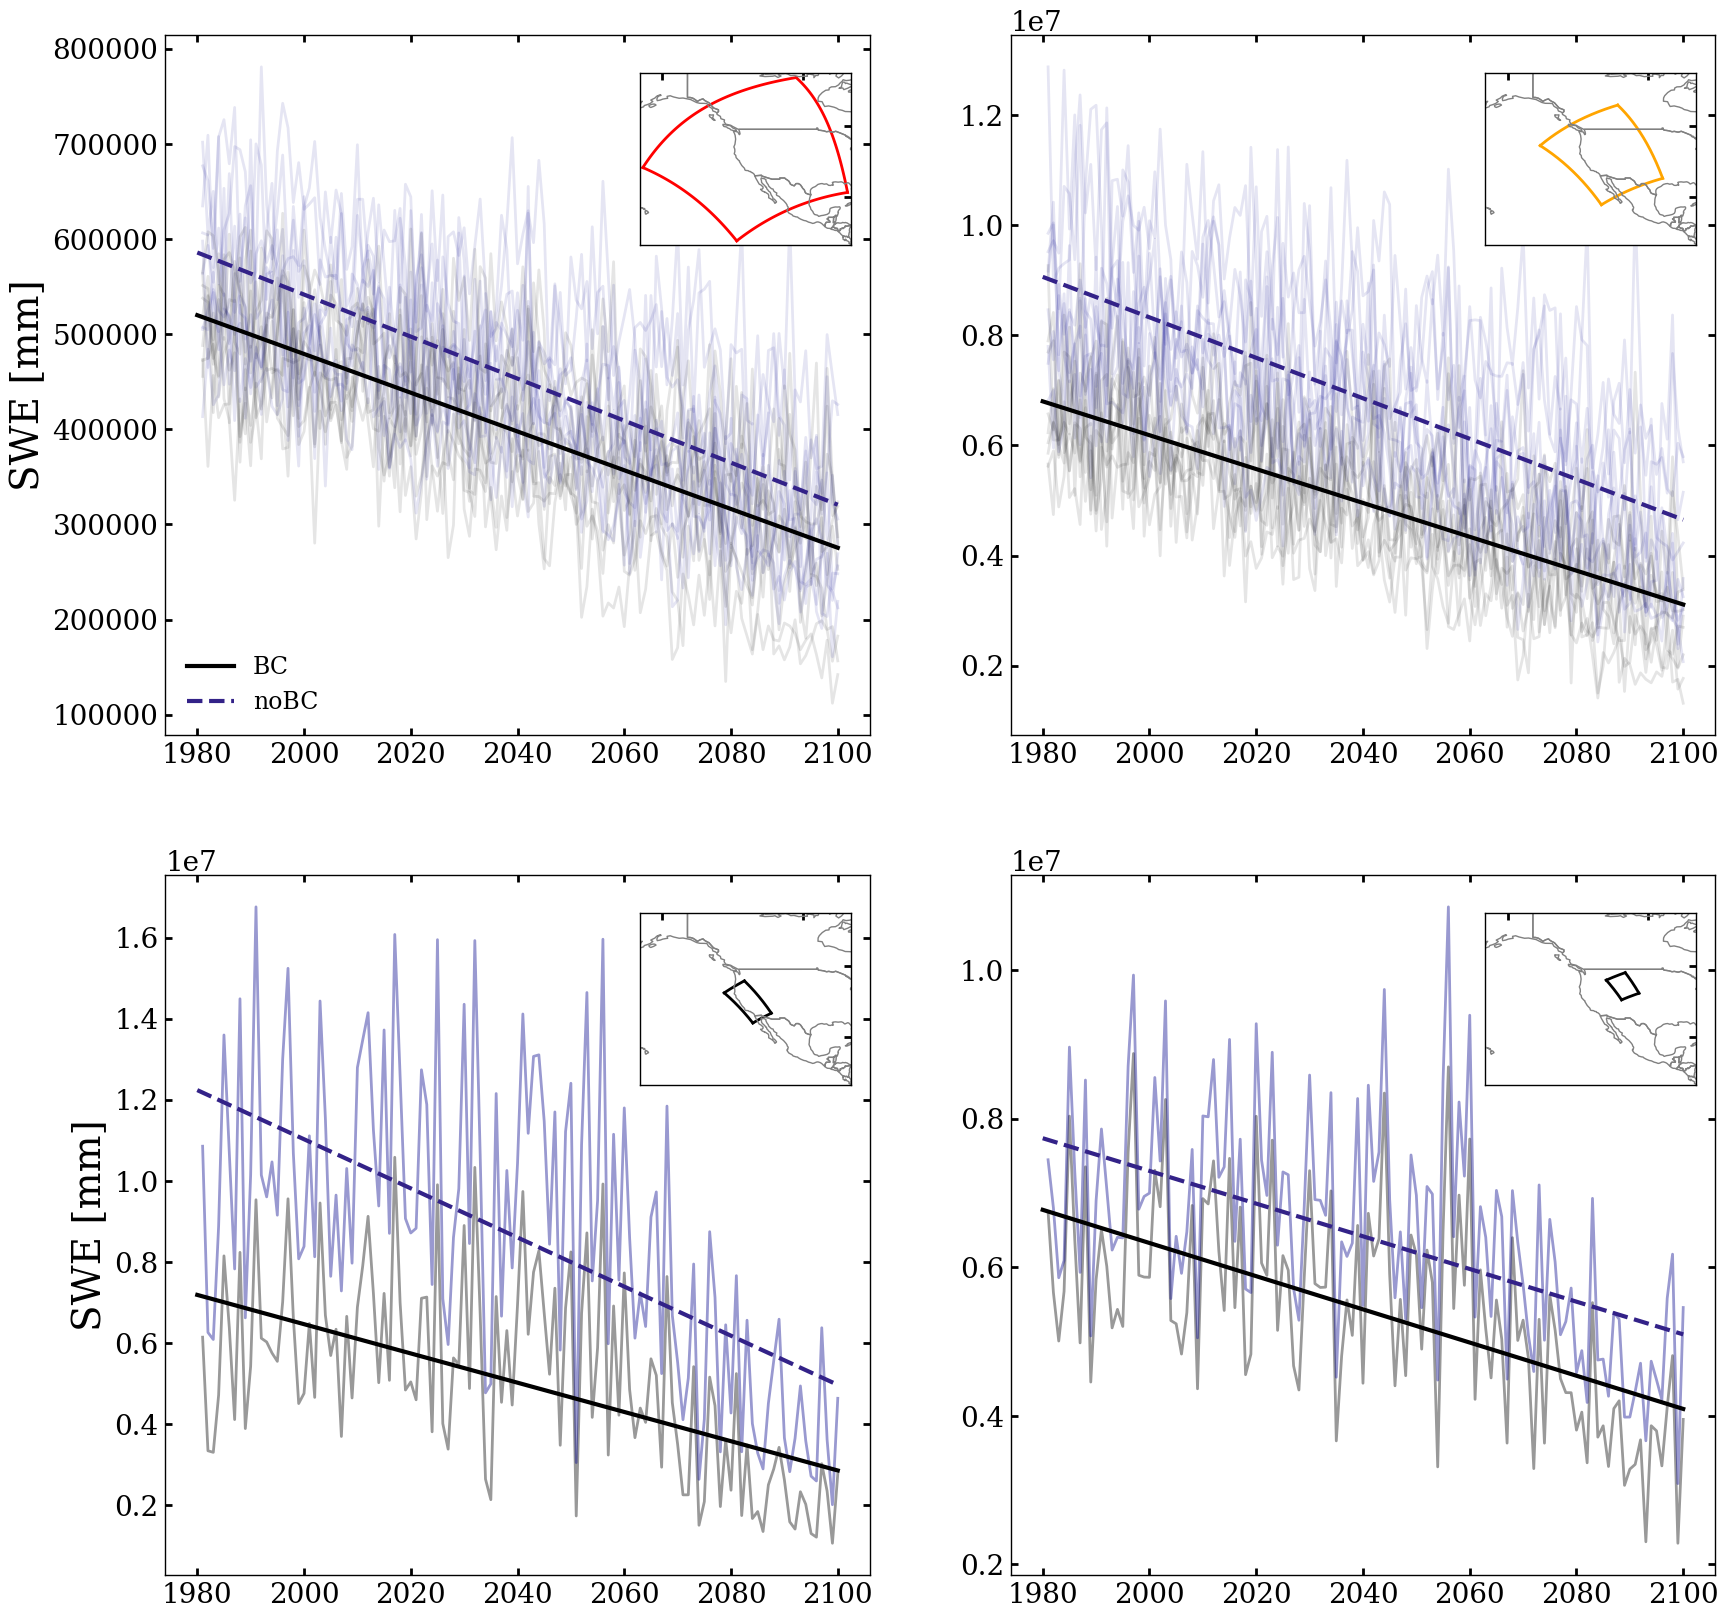

In [46]:

fig, ax = plt.subplots(2,2,figsize = (20,20))
axs = ax.flatten()
keys = list(snowmax_BC.keys())
for i, domain in enumerate(domains):
    color = clist[i][1]
    myax = axs[i]
    keys = snowmaxkeys[domain]
    
    for key in keys:
        ts = snowmax_BC[key]
        myax.plot(years[1:], ts[1:], alpha = styles[domain], color = styles['BC'][1])
        ts = snowmax_noBC[key]
        myax.plot(years[1:], ts[1:], alpha = styles[domain], color = styles['noBC'][1])
    
    trendline = lines_BC[domain] 
    myax.plot(x+1980, trendline, linestyle = styles['BC'][0], label = 'BC', linewidth = 3)
    trendline = lines_noBC[domain]
    myax.plot(x+1980, trendline, linestyle = styles['noBC'][0], label = 'noBC', linewidth = 3)
    # myax.set_title(domain)
    print(domain)
    if i %2 == 0: myax.set_ylabel(r'SWE [mm]')
    if i == 0: myax.legend(loc = 'lower left')
    coords = coords_dict[domain]
    inset_ax = inset_axes(myax, width="30%",  height="30%", loc=1, borderpad = 0.8, axes_kwargs=kwargs)
    inset_ax.tick_params(bottom=False)
    inset_ax.tick_params(left=False)
        
    inset_ax.plot(coords['XLONG'][0,:,0], coords['XLAT'][0,:,0], color =  color)
    inset_ax.plot(coords['XLONG'][0,:,-1], coords['XLAT'][0,:,-1], color =  color)
    inset_ax.plot(coords['XLONG'][0,0,:], coords['XLAT'][0,0,:], color = color)
    inset_ax.plot(coords['XLONG'][0,-1,:], coords['XLAT'][0,-1,:], color = color)
    
    world.boundary.plot(ax=inset_ax, linewidth =1, color = 'gray')
    inset_ax.set_xlim((-158,-83))
    inset_ax.set_ylim((8,69))
plt.show()
#fig.savefig('timeseries.jpg')

Figure 3:
time series of area of 1) CA HUC 2 and 2) WYOM HUC 2 that have different frequency of snow drought
REALLY NEED TO FIX THE SNOW DROUGHT DATA FIRST

In [5]:

gcms_list = {'d01':  ['cesm2','mpi-esm1-2-lr','cnrm-esm2-1','fgoals-g3','ukesm1-0-ll',
        'canesm5','ec-earth3-veg',],
        'd02': ['cesm2','mpi-esm1-2-lr','cnrm-esm2-1',
        'ec-earth3-veg','fgoals-g3','ukesm1-0-ll',
        'canesm5','access-cm2','ec-earth3',],
        'd03': ['ec-earth3-veg'],
        'd04': ['ec-earth3-veg']}
def make_sddata(domain):
    gcms = gcms_list[domain]
    sddata = {}
    for dr_t in ['all','dry','warm','warmdry','swei']:
        sddata[dr_t] = {}
        for gcm in gcms:
            sddata[dr_t][gcm] = {}

    for gcm in gcms:
        sddata[gcm] = {}
        swei = xr.open_dataset(f'{savepath}swei_max_snow_{gcm}_{domain}_BC.nc') #swei_datasets_maxsnw[f'{model}_{exp}']
        categ = xr.open_dataset(f'{savepath}categs_snow_{gcm}_{domain}_BC.nc')
        swei_cond = categ['swei_cond']
        pr_cond = categ['pr_cond']
        tas_cond = categ['tas_cond']
        sddata['all'][gcm] = swei_cond
        sddata['dry'][gcm] = swei_cond & pr_cond & ~tas_cond
        sddata['warm'][gcm] = swei_cond & ~pr_cond & tas_cond
        sddata['warmdry'][gcm] = swei_cond & pr_cond & tas_cond
        sddata['swei'][gcm] = swei 
    return sddata

def make_ts(domain, bounds):
    left = bounds[0]
    right = bounds[1]
    bottom = bounds[2]
    top = bounds[3]
    data2plot = make_sddata(domain)
    for key in data2plot.keys():
        for key2 in data2plot[key].keys():
            if key == 'swei':
                data2plot[key][key2] = data2plot[key][key2]['swei'][:,bottom:top,left:right]
            else:
                data2plot[key][key2] = data2plot[key][key2][:,bottom:top,left:right]
            
    snowdata = xr.open_dataset(glob.glob(savepath + f'snow*{domain}*_BC*')[0])
    snowarr = snowdata['snow'].data
    snowmask = np.nansum(snowarr[0:365*10], axis = (0)) > 1500
    coords = xr.open_dataset(f'{metapath}wrfinput_{domain}')
    landmask = coords['XLAND'][0]
    landmask1 = (landmask ==1).data
    landmask1 = landmask1[bottom:top,left:right]
    snowmask = snowmask[bottom:top,left:right]
    
    gcms = data2plot['all'].keys()
    
    categories = {
        'dry': None,
        'warmdry': None,
        'warm': None,}
    for name in categories.keys():
        tmp = []
        for gcm in gcms:
            tmp.append(data2plot[name][gcm].where(landmask1).where(snowmask))
        ds_concat = np.array(tmp)
        categories[name] = np.nanmean(ds_concat, axis = (0,2,3))
    wet = [] 
    lownorm = []
    highnorm = []
    for gcm in gcms:
        lownorm.append(((data2plot['swei'][gcm] > -0.8) & (data2plot['swei'][gcm] < 0 )).where(landmask1).where(snowmask))
        highnorm.append(((data2plot['swei'][gcm] > 0) & (data2plot['swei'][gcm] < 0.9 )).where(landmask1).where(snowmask))
        wet.append((data2plot['swei'][gcm] > 0.8).where(landmask1).where(snowmask))
    wet2 =  np.nanmean(np.array(wet), axis = (0,2,3))

    categories['lownorm'] = np.nanmean(np.array(lownorm), axis = (0,2,3))#  1 - categories['dry'] - categories['warm'] - categories['warmdry'] - wet2
    categories['highnorm'] = np.nanmean(np.array(highnorm), axis = (0,2,3))
    categories['wet'] = wet2
    
    #for name, data in categories.items():
    #    data[34] = np.nan
        
    return categories

In [6]:
from params import savepath


/glade/scratch/mcowherd/ipykernel_194631/2398170835.py:9: RuntimeWarning: invalid value encountered in double_scalars
  rescaled_values = [value / total for value, total in zip(values, totals)]
/glade/scratch/mcowherd/ipykernel_194631/2398170835.py:9: RuntimeWarning: invalid value encountered in double_scalars
  rescaled_values = [value / total for value, total in zip(values, totals)]
/glade/scratch/mcowherd/ipykernel_194631/2398170835.py:9: RuntimeWarning: invalid value encountered in double_scalars
  rescaled_values = [value / total for value, total in zip(values, totals)]
/glade/scratch/mcowherd/ipykernel_194631/2398170835.py:9: RuntimeWarning: invalid value encountered in double_scalars
  rescaled_values = [value / total for value, total in zip(values, totals)]


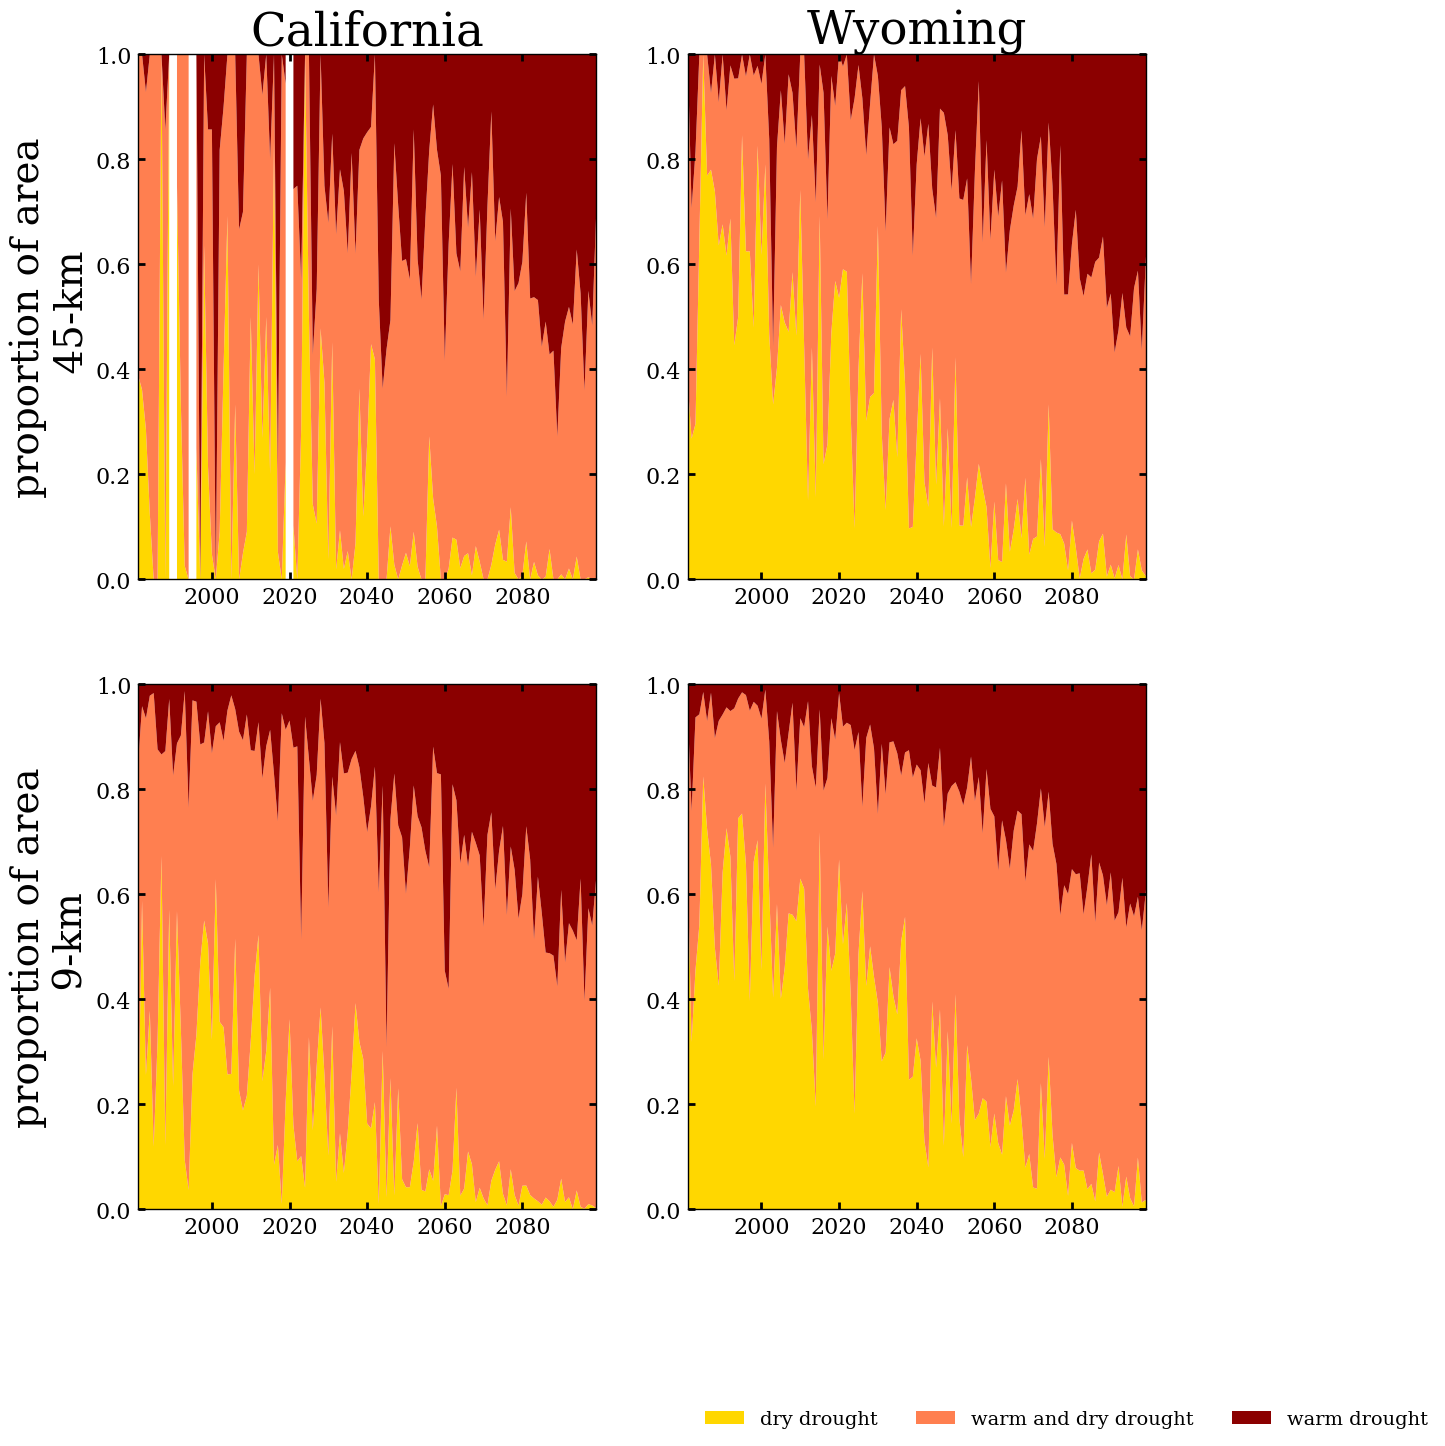

In [11]:
def rescale_lists(categories):
    rescaled_categories = {}

    # Calculate the total for each year across all categories
    totals = [sum(year) for year in zip(*categories.values())]

    # Iterate over each category in the dictionary
    for category, values in categories.items():
        rescaled_values = [value / total for value, total in zip(values, totals)]
        rescaled_categories[category] = rescaled_values

    return rescaled_categories

setup = [['d01', 'CA'],['d01','WY'],['d02', 'CA'],['d02','WY']] #,['d03', 'CA'],['d04','WY']]
years = range(1980,2101)
clist = ['gold', 'coral', 'darkred', 'darkgray', 'lightgray', 'mediumpurple']
boundaries = {'d01':{'CA': [43,60,35,68],
                     'WY': [68,81,43,63]},
              'd02':{'CA': [44,125,87,251],
                     'WY': [165,230,130,227]},
              'd03':{'CA': [0,-1,0,-1]},
              'd04':{'WY': [0,-1,0,-1]}}

label_list = ['dry drought', 'warm and dry drought', 'warm drought', 'low normal', 'high normal', 'wet']

fig, ax = plt.subplots(2,2, figsize = (13,15))
axs = ax.flatten()
for i, param in enumerate(setup):
    bounds = boundaries[param[0]][param[1]]
    categories = make_ts(param[0], bounds)
    categories2 = {'dry': categories['dry'],
                  'warmdry':categories['warmdry'],
                  'warm': categories['warm']}
    categories2 = rescale_lists(categories2)
    axs[i].stackplot(years,categories2.values(), labels = label_list[0:3], colors = clist[0:3])
    axs[i].set_ylim((0,1))
    axs[i].set_xlim((1981,2099))
axs[0].set_ylabel('proportion of area\n 45-km')
axs[2].set_ylabel('proportion of area\n 9-km')
#axs[4].set_ylabel('proportion of area\n 3-km')

#axs[4].set_xlabel('year')
#axs[5].set_xlabel('year')
axs[3].legend(loc = 'lower left', bbox_to_anchor = (0,-0.45), ncol = 6)
axs[0].set_title('California')
axs[1].set_title('Wyoming')
plt.show()

In [ ]:
setup = [['d01', 'CA'],['d01','WY'],['d02', 'CA'],['d02','WY']] #,['d03', 'CA'],['d04','WY']]
years = range(1980,2101)
clist = ['gold', 'coral', 'darkred', 'darkgray', 'lightgray', 'mediumpurple']
label_list = ['dry drought', 'warm and dry drought', 'warm drought', 'low normal', 'high normal', 'wet']

boundaries = {'d01':{'CA': [43,60,35,68],
                     'WY': [68,81,43,63]},
              'd02':{'CA': [44,125,87,251],
                     'WY': [165,230,130,227]},
              'd03':{'CA': [0,-1,0,-1]},
              'd04':{'WY': [0,-1,0,-1]}}

label_list = ['dry drought', 'warm and dry drought', 'warm drought'] #, 'low normal', 'high normal', 'wet']

fig, ax = plt.subplots(2,2, figsize = (13,15))
axs = ax.flatten()
for i, param in enumerate(setup):
    bounds = boundaries[param[0]][param[1]]
    categories = make_ts(param[0], bounds)
    axs[i].stackplot(years,categories.values(), labels = label_list, colors = clist)
    axs[i].set_ylim((0,1))
    axs[i].set_xlim((1981,2099))
axs[0].set_ylabel('proportion of area\n 45-km')
axs[2].set_ylabel('proportion of area\n 9-km')
#axs[4].set_ylabel('proportion of area\n 3-km')

axs[2].set_xlabel('year')
axs[3].set_xlabel('year')
axs[2].legend(loc = 'lower left', bbox_to_anchor = (0,-0.45), ncol = 6)
axs[0].set_title('California')
axs[1].set_title('Wyoming')
plt.show()

/glade/scratch/mcowherd/ipykernel_68302/4148782192.py:9: RuntimeWarning: invalid value encountered in double_scalars
  rescaled_values = [value / total for value, total in zip(values, totals)]
/glade/scratch/mcowherd/ipykernel_68302/4148782192.py:9: RuntimeWarning: invalid value encountered in double_scalars
  rescaled_values = [value / total for value, total in zip(values, totals)]
/glade/scratch/mcowherd/ipykernel_68302/2140855274.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels([1980,2000,2020,2040,2060,2080,2100])


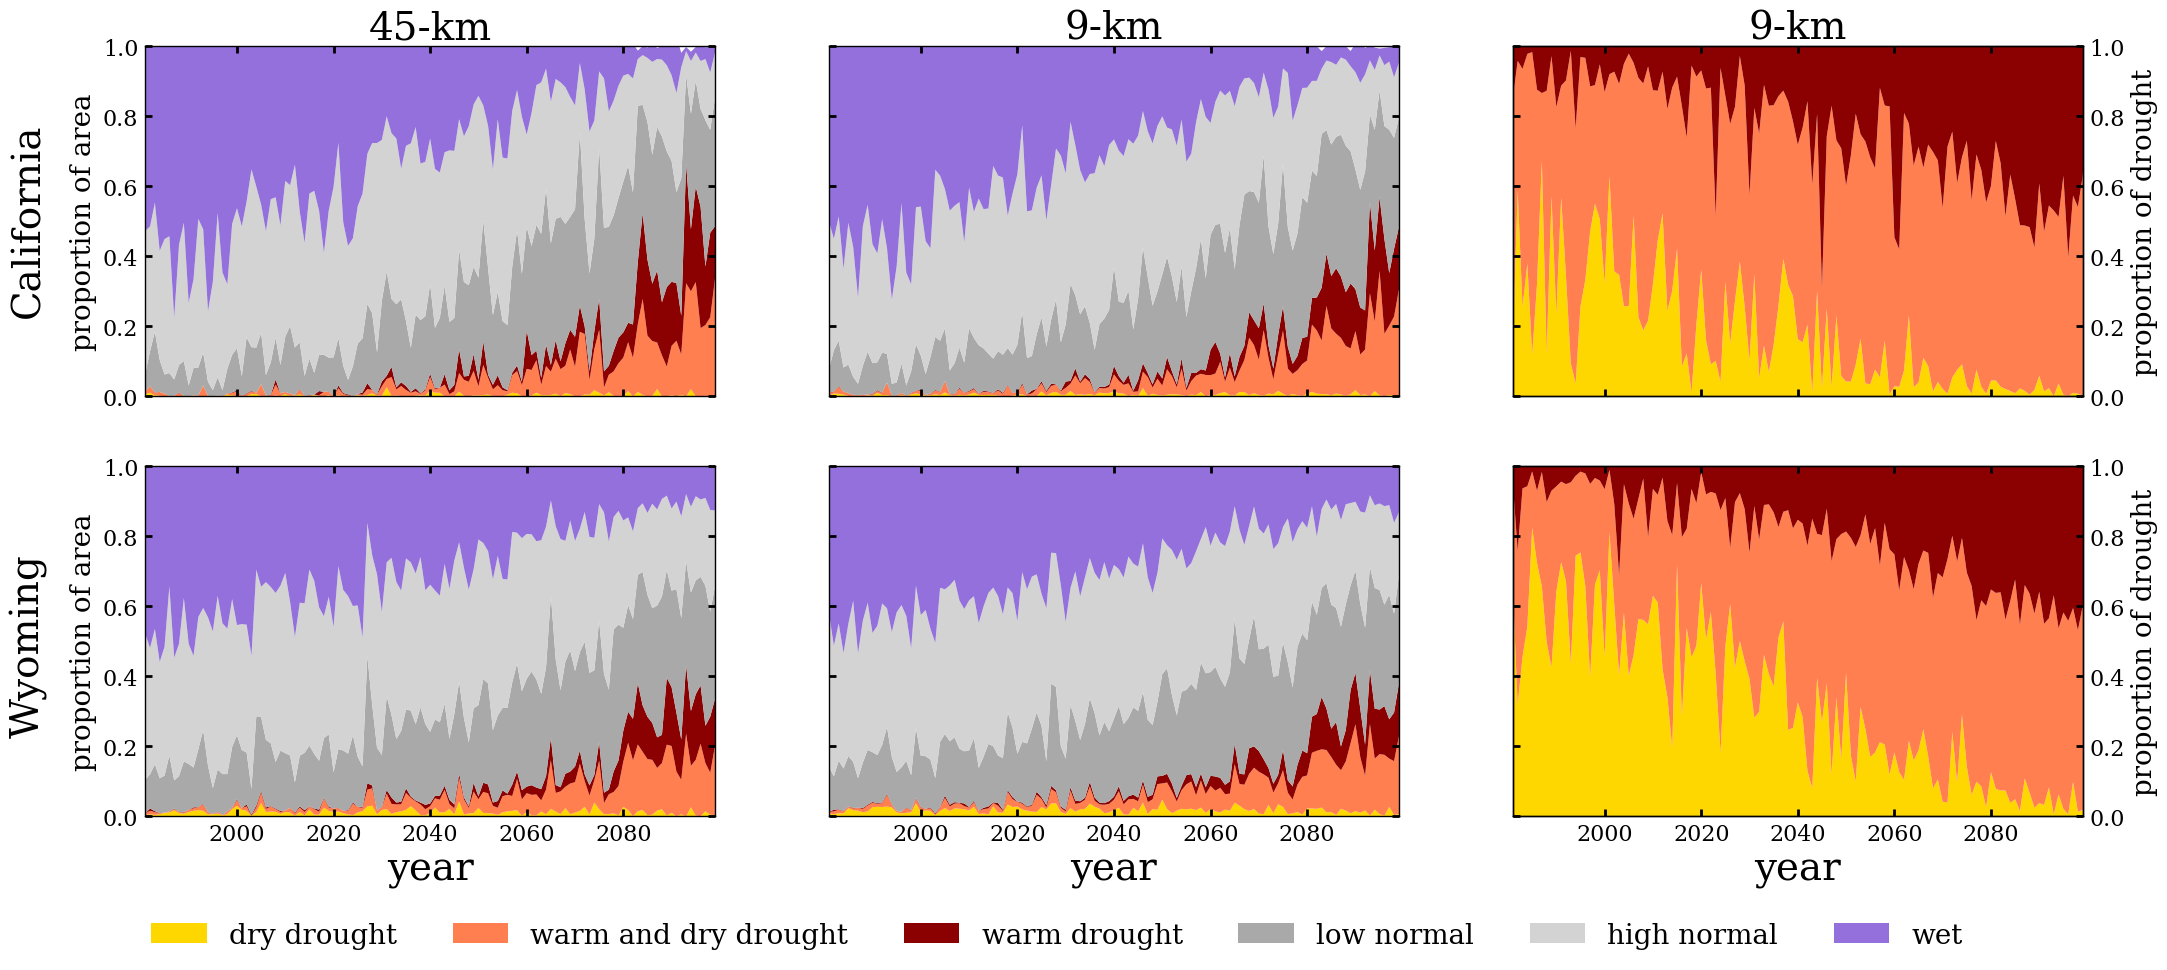

In [55]:
## third version: only the 45 and 9 km, transpose resolution and region, add a third column showing drought type (9km only)
setup = [['d01', 'CA'],['d02', 'CA'], ['d02', 'CA'], ['d01','WY'],['d02','WY'], ['d02','WY']]
color_list = ['gold', 'coral', 'darkred', 'darkgray', 'lightgray', 'mediumpurple']
label_list = ['dry drought', 'warm and dry drought', 'warm drought', 'low normal', 'high normal', 'wet']

fig, ax = plt.subplots(2,3, figsize = (25,10))
axs = ax.flatten()

for i, param in enumerate(setup):
    bounds = boundaries[param[0]][param[1]]
    categories = make_ts(param[0], bounds)
    if i in [2,5]:
        categories2 = {'dry': categories['dry'],
                  'warmdry':categories['warmdry'],
                  'warm': categories['warm']}
        categories = rescale_lists(categories2)
        labels = label_list[0:3]
        colors = color_list[0:3]
    else:
        labels = label_list
        colors = color_list
        
    axs[i].stackplot(years,categories.values(), labels = labels, colors = colors)
    axs[i].set_ylim((0,1))
    axs[i].set_xlim((1981,2099))
  
    if i in [1,2,4,5]:
        axs[i].set_yticklabels([])
    if i < 3:
        axs[i].set_xticklabels([])


axs[0].set_ylabel('proportion of area', fontsize = 20)
axs[3].set_ylabel('proportion of area', fontsize = 20)
axs[0].text(1953, 0.25, 'California', fontsize = 28, rotation = 90)
axs[3].text(1953, 0.25, 'Wyoming', fontsize =28, rotation = 90)

axs[2].twinx().set_ylabel('proportion of drought', fontsize = 20)
axs[5].twinx().set_ylabel('proportion of drought', fontsize = 20)

axs[3].set_xlabel('year')
axs[4].set_xlabel('year')
axs[5].set_xlabel('year')
for i in range(3,6):
    axs[i].set_xticklabels([1980,2000,2020,2040,2060,2080,2100])


axs[4].legend(loc = 'lower center', bbox_to_anchor = (0.4,-0.45), ncol = 6, fontsize = 20)
axs[0].set_title('45-km', fontsize = 28)
axs[1].set_title('9-km', fontsize = 28)
axs[2].set_title('9-km', fontsize = 28)
#plt.tight_layout()
plt.show()

Figure 4:
plot of trajectory of character of snow drought in different regions and different resolutions and biases

/glade/scratch/mcowherd/ipykernel_175049/2241293802.py:32: RuntimeWarning: Mean of empty slice
  pr_list.append((np.nanmean(pr_of_sd,axis = (1,2))))
/glade/scratch/mcowherd/ipykernel_175049/2241293802.py:33: RuntimeWarning: Mean of empty slice
  t_list.append((np.nanmean(t_of_sd,axis = (1,2))))
/glade/scratch/mcowherd/ipykernel_175049/2241293802.py:34: RuntimeWarning: Mean of empty slice
  swei_list.append((np.nanmean(swei_of_sd,axis = (1,2))))
/glade/scratch/mcowherd/ipykernel_175049/2241293802.py:35: RuntimeWarning: Mean of empty slice
  pr_ts = np.nanmean(np.array(pr_list),axis = 0)
/glade/scratch/mcowherd/ipykernel_175049/2241293802.py:36: RuntimeWarning: Mean of empty slice
  t_ts = np.nanmean(np.array(t_list), axis = 0)


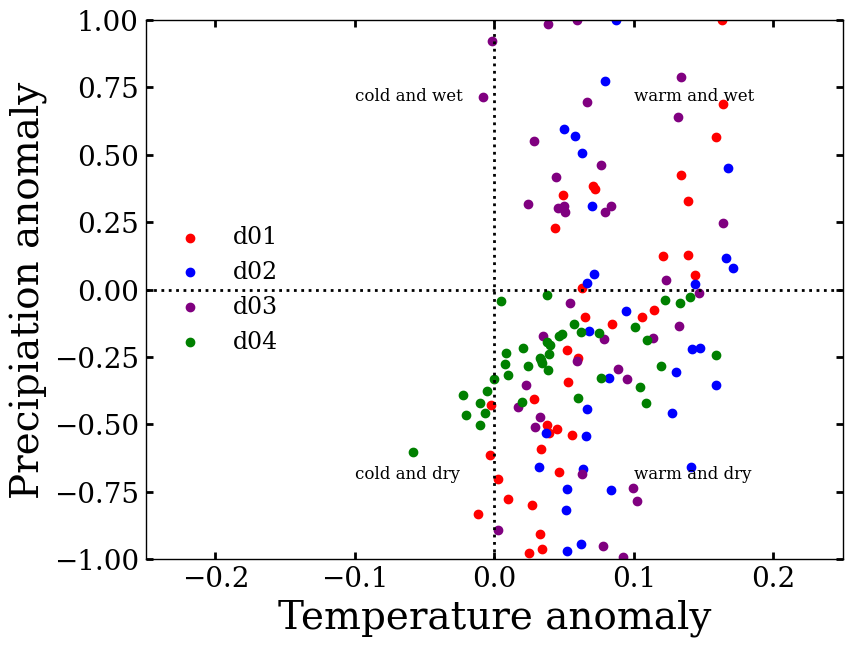

In [14]:
xv = 1
yv = xv
def rolling_bins(arr, binsize):
    grouped_values = [arr[i:i+binsize] for i in range(0, len(arr), binsize)]
    return [np.mean(group) for group in grouped_values]


styles = {'BC':['-','black'],
          'noBC': [':', 'darkblue'],
          'd01': 'red',
          'd02': 'blue',
          'd03': 'purple',
          'd04': 'green'
         }
binsize = 3
fig,ax = plt.subplots()
ax.plot([-xv,xv],[0,0], 'k:')
ax.plot([0,0],[-yv,yv], 'k:')
#

for domain in ['d01','d02','d03','d04']:
    bc = 'BC'
    fns = glob.glob(f'{savepath}categs_snow_*{domain}_{bc}.nc')
    pr_list = []
    t_list = []
    swei_list = []
    for fn in fns:
        data = xr.open_dataset(fn)
        pr_of_sd = data.pr.where(data.swei_cond)
        t_of_sd = data.tas.where(data.swei_cond)
        swei_of_sd = data.swei.where(data.swei_cond)
        pr_list.append((np.nanmean(pr_of_sd,axis = (1,2))))
        t_list.append((np.nanmean(t_of_sd,axis = (1,2))))
        swei_list.append((np.nanmean(swei_of_sd,axis = (1,2))))
    pr_ts = np.nanmean(np.array(pr_list),axis = 0)
    t_ts = np.nanmean(np.array(t_list), axis = 0)
    
    t_ts = rolling_bins(t_ts, binsize)
    pr_ts = rolling_bins(pr_ts, binsize)

    ax.scatter(t_ts / np.nanmax(t_ts), \
               pr_ts / np.nanmax(pr_ts), \
               color = styles[domain], label = domain)
#

ax.text(0.1,-0.7, 'warm and dry', fontsize = 12)
ax.text(0.1,0.7, 'warm and wet', fontsize = 12)
ax.text(-0.1,0.7, 'cold and wet', fontsize = 12)
ax.text(-0.1,-0.7, 'cold and dry', fontsize = 12)

ax.set_xlabel('Temperature anomaly')
ax.set_ylabel('Precipiation anomaly')
xv = 0.25
ax.set_xlim((-xv,xv))
ax.set_ylim((-yv, yv))

ax.legend(loc = 'center left')
plt.show()

/glade/scratch/mcowherd/ipykernel_76518/2190609524.py:37: RuntimeWarning: Mean of empty slice
  pr_list.append((np.nanmean(pr_of_sd,axis = (1,2))))
/glade/scratch/mcowherd/ipykernel_76518/2190609524.py:38: RuntimeWarning: Mean of empty slice
  t_list.append((np.nanmean(t_of_sd,axis = (1,2))))
/glade/scratch/mcowherd/ipykernel_76518/2190609524.py:39: RuntimeWarning: Mean of empty slice
  swei_list.append((np.nanmean(swei_of_sd,axis = (1,2))))
/glade/scratch/mcowherd/ipykernel_76518/2190609524.py:40: RuntimeWarning: Mean of empty slice
  pr_ts = np.nanmean(np.array(pr_list),axis = 0)
/glade/scratch/mcowherd/ipykernel_76518/2190609524.py:41: RuntimeWarning: Mean of empty slice
  t_ts = np.nanmean(np.array(t_list), axis = 0)


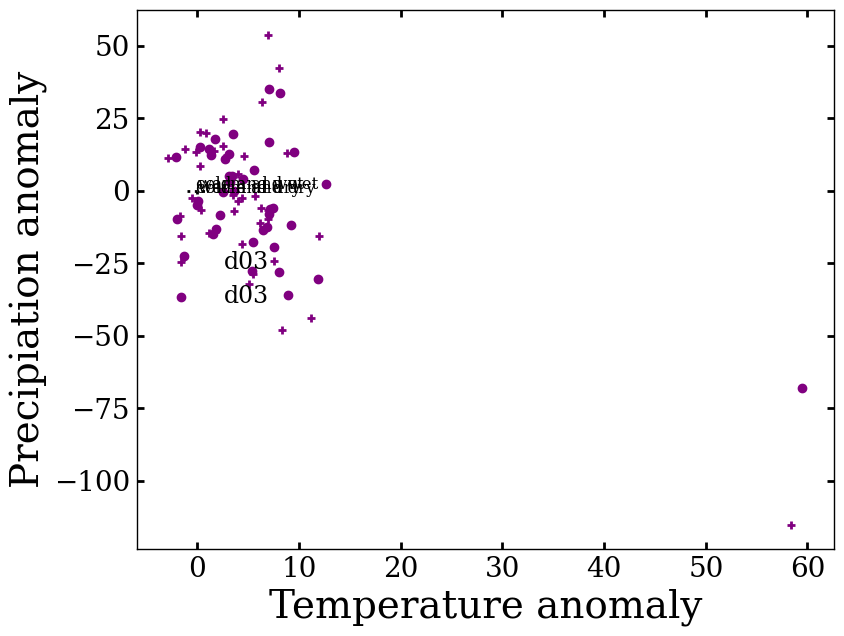

In [7]:
xv = 1
yv = xv
def rolling_bins(arr, binsize):
    grouped_values = [arr[i:i+binsize] for i in range(0, len(arr), binsize)]
    return [np.mean(group) for group in grouped_values]


styles = {'BC':['-','black'],
          'noBC': [':', 'darkblue'],
          'd01': 'red',
          'd02': 'blue',
          'd03': 'purple',
          'd04': 'green',
          'wind': '+',
          'lee': 'o'
         }
binsize = 3
fig,ax = plt.subplots()
ax.plot([-xv,xv],[0,0], 'k:')
ax.plot([0,0],[-yv,yv], 'k:')
#

for domain in ['d03']:
    sidemasks = xr.open_dataset(f'masks_{domain}_sn.nc')
    bc = 'BC'
    fns = glob.glob(f'{savepath}categs_snow_*{domain}_{bc}.nc')
    pr_list = []
    t_list = []
    swei_list = []
    for sidename in ['wind', 'lee']:
        sidemask = sidemasks.sel(side = sidename).basin_mask.values
        for fn in fns:
            data = xr.open_dataset(fn)
            pr_of_sd = data.pr.where(data.swei_cond).where(sidemask)
            t_of_sd = data.tas.where(data.swei_cond).where(sidemask)
            swei_of_sd = data.swei.where(data.swei_cond).where(sidemask)
            pr_list.append((np.nanmean(pr_of_sd,axis = (1,2))))
            t_list.append((np.nanmean(t_of_sd,axis = (1,2))))
            swei_list.append((np.nanmean(swei_of_sd,axis = (1,2))))
        pr_ts = np.nanmean(np.array(pr_list),axis = 0)
        t_ts = np.nanmean(np.array(t_list), axis = 0)

        t_ts = rolling_bins(t_ts, binsize)
        pr_ts = rolling_bins(pr_ts, binsize)

        ax.scatter(t_ts, \
                   pr_ts,  \
                   color = styles[domain], \
                   marker = styles[sidename], \
                   label = domain )
#

ax.text(0.1,-0.7, 'warm and dry', fontsize = 12)
ax.text(0.1,0.7, 'warm and wet', fontsize = 12)
ax.text(-0.1,0.7, 'cold and wet', fontsize = 12)
ax.text(-0.1,-0.7, 'cold and dry', fontsize = 12)

ax.set_xlabel('Temperature anomaly')
ax.set_ylabel('Precipiation anomaly')
xv = 0.25
#ax.set_xlim((-xv,xv))
#ax.set_ylim((-yv, yv))

ax.legend(loc = 'center left')
plt.show()



Figure 5: elevation distributions of snow on the lee and wind sieds

In [7]:

def load_data(domain, bc, variable = 'snow'):
    fns = glob.glob(f'/glade/campaign/uwyo/wyom0112/berkeley/{variable}_*{domain}_{bc}.nc') 
    data = []
    for fn in fns:
        tmp = xr.open_dataset(fn)
        if variable == 'snow':
            tmpmax = tmp.groupby(tmp.time.dt.year).max()
        else:
            tmpmax = tmp.groupby(tmp.time.dt.year).sum()
        data.append(tmpmax)
    data_all = xr.concat(data, dim = 'gcm')
    data_mean = data_all.mean(dim = 'gcm')
    return data_all, data_mean

def prep_data_by_elev(elevation, swe, sidemasks):
    sidenames = list(sidemasks.side.values)
    snow_by_elev_bin = {}
    swei_by_elev_bin = {}
    prec_by_elev_bin = {}
    temp_by_elev_bin = {}
    area_by_elev_bin = {}
    for subregion in sidenames:
        snow_by_elev_bin[subregion] = []
        area_by_elev_bin[subregion] = []
    elevation_min = elevation.min()
    elevation_max = elevation.max()
    elevation_step = 200
    elevation_data= elevation.data
    elevation_bins = np.arange(elevation_min, elevation_max + elevation_step, elevation_step)

    ## elevation mask
    mask = np.logical_and(elevation_data >= elevation_bins[:-1, np.newaxis, np.newaxis], elevation_data < elevation_bins[1:, np.newaxis, np.newaxis])

    for i in range(12):
        y1 = 1980 + (10 * i)
        day_start = f"{y1}-10-01"
        day_end = f"{y1+10}-09-30"
        swe_sorted = swe #.sortby('year')
        day_start = np.datetime64(day_start)
        day_end = np.datetime64(day_end)

        # Select the subset of the dataset within the day range
        #subset = swe_sorted.sel(time=slice(day_start, day_end)).mean(dim = 'time')
        subset = swe_sorted.sel(year = slice(y1, y1+10)).mean(dim = 'year')
        # Take the average of the "swe" variable across all days in the subset
        max_swe = subset['snow'].values #["swe"].max(dim="day").compute()

        for j,sidename in enumerate(sidenames):
            regmask = sidemasks.sel(side = sidename).basin_mask.values
            snow = (max_swe * regmask * mask).sum(axis = (1,2))
            area = mask.sum(axis = (1,2))
            snow_by_elev_bin[sidename].append(snow)
            area_by_elev_bin[sidename].append(area)
    return snow_by_elev_bin, area_by_elev_bin, elevation_bins

def eoc_by_elev(elevation_mask, eoc_diff, sidemasks):
    sidenames = list(sidemasks.side.values)
    snow_by_elev_bin = {}
    area_by_elev_bin = {}
    for subregion in sidenames:
        snow_by_elev_bin[subregion] = []
        area_by_elev_bin[subregion] = []
    snow_by_elev_bin['all'] = []
    area_by_elev_bin['all'] = []

    for j,sidename in enumerate(sidenames):
        regmask = sidemasks.sel(side = sidename).basin_mask.values
        snow = (eoc_diff * regmask * elevation_mask).sum(axis = (1,2))
        area = mask.sum(axis = (1,2))
        snow_by_elev_bin[sidename].append(snow)
        area_by_elev_bin[sidename].append(area)
    return snow_by_elev_bin, area_by_elev_bin, elevation_bins

def make_elev_plot(snow_by_elev_bin, area_by_elev_bin, elevation_bins, coords, sidemasks):
    sidenames = list(sidemasks.side.values)
    lat_array = coords['XLAT'][0].data
    lon_array = coords['XLONG'][0].data 
    elevation = coords['HGT'][0].data

    f, ax = plt.subplots(2, 2, height_ratios=[3,1])
    axs = ax.flatten()
    axs[1].axvspan(0, 4, facecolor='lightgray', alpha=0.5)
    axs[1].axvspan(-4, 0, facecolor='white', alpha=0.5)
    yrs = [0,6,10]
    style = {'lee': '--',
             'wind': '-',
             'prec': 'darkblue',
             'temp': 'orchid'}
    yrcolors = ["black", "#332288","#88CCEE","#44AA99","#117733",
                "#999933","#DDCC77","#CC6677","#882255","#AA4499","brown","#fd3c06","gray"]
    profs = []
    cmap = 'Reds_r'
    for i, subregion in enumerate(sidenames):
        regmask = sidemasks.sel(side = subregion).basin_mask.values
        diff = np.nanmean(swe['snow'][-30:].where(regmask), axis = (0)) - np.nanmean(swe['snow'][30:].where(regmask), axis = 0)
        axs[0].pcolormesh(lon_array, lat_array,diff, cmap = cmap)
        profile = np.nanmean((elevation * regmask), axis= 0)
        profs.append(profile)
        snowdata = snow_by_elev_bin[subregion]
        for j in range(3):
            data = (snowdata[yrs[j]]) 
            label = None
            if subregion == 'wind': 
                data = -data
                label = yrs[j] * 10  +1980
            axs[1].plot(data / np.abs(np.nanmax(np.abs(data))) , 
                    elevation_bins[1:], linestyle =style[subregion], 
                    color = yrcolors[j] ,label =  label)
        cmap = 'Blues_r'
    axs[1].set_ylabel('elevation')
    axs[0].set_xlim((-121, -118))
    axs[0].set_ylim((36,40))
    axs[1].set_ylim((1000,3800))
    axs[1].set_xlim((-1.3,1.3))
    axs[1].text(-1, 3500, 'windward')
    axs[1].text(0.1,3500, 'leeward')
    axs[1].legend()
    profile = profs[0] + profs[1]
    axs[3].plot(profile, color = 'darkred')
    # axs[3].set_xlim((53,115))
    plt.show()
    return


In [8]:
elevation_min = 900
elevation_max = 3500
elevation_step = 50

elevation_data = elevation
elevation_bins = np.arange(elevation_min, elevation_max + elevation_step, elevation_step)
eoc_diff = diff_eoc['d_tas'].values
## elevation mask

elevation_mask = np.logical_and(elevation_data >= elevation_bins[:-1, np.newaxis, np.newaxis], elevation_data < elevation_bins[1:, np.newaxis, np.newaxis])

sidenames = list(sidemasks.side.values)
snow_by_elev_bin = {}
area_by_elev_bin = {}
snow_mean_by_elev_bin = {}

for j,sidename in enumerate(sidenames):
    regmask = sidemasks.sel(side = sidename).basin_mask.values
    snow = (eoc_diff * regmask * elevation_mask).sum(axis = (1,2))
    snowmean = (eoc_diff * regmask * elevation_mask).mean(axis = (1,2))
    area = (elevation_mask * regmask).sum(axis = (1,2))
    snow_by_elev_bin[sidename] = (snow)
    area_by_elev_bin[sidename] = (area)
    snow_mean_by_elev_bin[sidename] = (snowmean)


regmask = sidemasks.sel(side = ['wind','lee'])['basin_mask'].sum(dim = 'side').values
snow = (eoc_diff * regmask * elevation_mask).sum(axis = (1,2))
snowmean = (eoc_diff * regmask * elevation_mask).mean(axis = (1,2))
area = (elevation_mask * regmask).sum(axis = (1,2))
snow_by_elev_bin['all'] = (snow)
area_by_elev_bin['all'] = (area)
snow_mean_by_elev_bin['all'] = (snowmean)


NameError: name 'elevation' is not defined

In [6]:
boundaries = {'d01':{'CA': [43,60,35,68],
                     'WY': [68,81,43,63]},
              'd02':{'CA': [44,125,87,251],
                     'WY': [165,230,130,227]},
              'd03':{'CA': [0,-1,0,-1]},
              'd04':{'WY': [0,-1,0,-1]}}

In [15]:
domain = 'd02'
state = 'WY'
left, right, bottom, top = boundaries[domain][state]
wy_d02_diff_eoc = diff_eoc.sel(lat = slice(bottom, top),lon = slice(left, right))
wy_coords = coords.sel(south_north = slice(bottom, top),west_east = slice(left, right))
wy_lat = wy_coords['XLAT'][0]
wy_lat = wy_coords['XLONG'][0]
wy_elev = wy_coords['HGT'][0]
domain = 'd02'
state = 'CA'
left, right, bottom, top = boundaries[domain][state]
ca_d02_diff_eoc = diff_eoc.sel(lat = slice(bottom, top),lon = slice(left, right))
ca_coords = coords.sel(south_north = slice(bottom, top),west_east = slice(left, right))
ca_lat = ca_coords['XLAT'][0]
ca_lat = ca_coords['XLONG'][0]
ca_elev = ca_coords['HGT'][0]

NameError: name 'diff_eoc' is not defined

In [ ]:
elevation_data = wy_elev.values
elevation_bins = np.arange(elevation_min, elevation_max + elevation_step, elevation_step)
eoc_diff = wy_d02_diff_eoc['d_tas'].values

elevation_mask = np.logical_and(elevation_data >= elevation_bins[:-1, np.newaxis, np.newaxis], elevation_data < elevation_bins[1:, np.newaxis, np.newaxis])
snow = (eoc_diff  * elevation_mask).sum(axis = (1,2))
area = (elevation_mask).sum(axis = (1,2))
wy_mean_by_elev_bin = (eoc_diff * elevation_mask).mean(axis = (1,2))
wy_snow_by_elev_bin = snow
wy_area_by_elev_bin = area


In [ ]:
elevation_data =ca_elev.values
elevation_bins = np.arange(elevation_min, elevation_max + elevation_step, elevation_step)
eoc_diff = ca_d02_diff_eoc['d_tas'].values

elevation_mask = np.logical_and(elevation_data >= elevation_bins[:-1, np.newaxis, np.newaxis], elevation_data < elevation_bins[1:, np.newaxis, np.newaxis])
snow = (eoc_diff  * elevation_mask).sum(axis = (1,2))
area = (elevation_mask).sum(axis = (1,2))
ca_mean_by_elev_bin = (eoc_diff * elevation_mask).mean(axis = (1,2))
ca_snow_by_elev_bin = snow
ca_area_by_elev_bin = area

In [ ]:
wy_sum = wy_snow_by_elev_bin
wy_mean = wy_mean_by_elev_bin
wy_area = wy_area_by_elev_bin
ca_sum = ca_snow_by_elev_bin
ca_mean = ca_mean_by_elev_bin
ca_area = ca_area_by_elev_bin
sn_sum = snow_by_elev_bin['all']
sn_mean= snow_mean_by_elev_bin['all']
sn_area = area_by_elev_bin['all']
e = elevation_bins[0:-1]

In [ ]:
fig,ax = plt.subplots(1,2)
ax[0].plot(wy_snow_by_elev_bin, elevation_bins[0:-1])
ax[0].plot(ca_snow_by_elev_bin, elevation_bins[0:-1])
ax[1].plot(wy_area_by_elev_bin, elevation_bins[0:-1], ':')
ax[1].plot(ca_snow_by_elev_bin, elevation_bins[0:-1], ':')
plt.show()

In [ ]:
fig,ax = plt.subplots(1,1)
ax.plot(wy_mean_by_elev_bin/3.2, elevation_bins[0:-1], label = 'WY')
ax.plot(snow_mean_by_elev_bin['all']/0.23, elevation_bins[0:-1], label = 'CA', color = 'red')
ax.plot(wy_area_by_elev_bin/np.nanmax(wy_area_by_elev_bin), elevation_bins[0:-1], ':')
ax.plot(area_by_elev_bin['all']/np.nanmax(area_by_elev_bin['all']), elevation_bins[0:-1], ':')
ax.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Fit a Nth-order polynomial to the data
degree = 2
coeff_wy = np.polyfit(e, wy_sum / wy_area, degree)
coeff_ca = np.polyfit(e, ca_sum / ca_area, degree)

# Evaluate the polynomial at fine intervals to create a smoothed curve
e_smooth = np.linspace(e.min(), e.max(), 1000)
smoothed_wy = np.polyval(coeff_wy, e_smooth)
smoothed_ca = np.polyval(coeff_ca, e_smooth)

# Plot the smoothed data
ax.plot(smoothed_wy, e_smooth, label='WY')
ax.plot(smoothed_ca, e_smooth, label='CA', color='red')

# Add labels and legend
ax.set_xlabel('X-Axis Label')
ax.set_ylabel('Y-Axis Label')
ax.set_title('Smoothed Plot')
ax.legend()

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
fig,ax = plt.subplots(1,1, figsize= (5,5))
ax.plot(wy_sum/wy_area, e, label = 'WY')
ax.plot(ca_sum/ca_area, e, label = 'CA', color = 'red')
ax.plot(sn_sum/sn_area, e, label = 'SN', color = 'green')
ax.legend()
plt.show()

In [10]:
def smooth_elev(data,e, ws = 5):
    ds = pd.Series(data).rolling(window=ws, min_periods=1).mean()
    es = pd.Series(e).rolling(window= ws, min_periods =1).mean()
    return ds.values, es.values

In [ ]:
fig,ax = plt.subplots(1,1, figsize= (3,9))
ax.plot(smooth_elev(wy_sum/wy_area, e)[0]/20,smooth_elev(wy_sum/wy_area, e)[1], label = 'WY', color = 'darkblue')
ax.plot(smooth_elev(ca_sum/ca_area, e)[0]/150, smooth_elev(wy_sum/wy_area, e)[1], label = 'CA', color = 'sienna', linestyle = ':')
ax.plot(smooth_elev(sn_sum/sn_area, e)[0]/150, smooth_elev(wy_sum/wy_area, e)[1], label = 'SN', color = 'sienna')
ax.legend()
ax.set_ylabel('Elevation [m]', fontsize = 16)
ax.set_xlabel(r'$\Delta$SWE$\Delta$T$^{-1}$A${^{-1}}$ proportion', fontsize = 14)
plt.show()

In [ ]:
fig,ax = plt.subplots(1,1, figsize= (5,5))
ax.plot(wy_mean/3, e, label = 'WY')
ax.plot(ca_mean/0.25, e, label = 'CA', color = 'red')
ax.legend()
plt.show()

In [ ]:
names = ['wind','lee','all']
for name in names[:]:
    plt.plot(snow_by_elev_bin[name],
             elevation_bins[0:-1], alpha = 1, label = name)
plt.legend()
    

In [7]:
from params import homedir
huc4_16 = gpd.read_file(f'{homedir}data/huc16/WBDHU4.shp')
huc6_16 = gpd.read_file(f'{homedir}data/huc16/WBDHU6.shp')
huc8_16 = gpd.read_file(f'{homedir}data/huc16/WBDHU8.shp')
huc4_18 = gpd.read_file(f'{homedir}data/huc18/WBDHU4.shp')
huc6_18 = gpd.read_file(f'{homedir}data/huc18/WBDHU6.shp')
huc8_18 = gpd.read_file(f'{homedir}data/huc18/WBDHU8.shp')
eco3 = gpd.read_file(f'{homedir}data/reg9_eco_l3.shp').to_crs('epsg:4326')
sn = eco3[eco3.US_L3NAME == 'Sierra Nevada']
huc8 = gpd.GeoDataFrame(pd.concat([huc8_16, huc8_18], ignore_index=True), crs=huc8_18.crs).to_crs('epsg:4326')
in_sn = huc8.sjoin(sn).reset_index()
in_sn.drop_duplicates(subset='name', inplace=True)
idx_lee = [1,4,2,0,3,29,30, 31, 32]
idx_wind = [i for i in in_sn.index if i not in idx_lee]
lines_wind= gpd.GeoSeries(in_sn.loc[idx_wind]['geometry'].boundary)
lines_lee = gpd.GeoSeries(in_sn.loc[idx_lee]['geometry'].boundary)
combined_wind = lines_wind.unary_union
combined_lee = lines_lee.unary_union
overlap = combined_wind.intersection(combined_lee)
gdf_overlap = gpd.GeoDataFrame(geometry=gpd.GeoSeries(overlap), crs=in_sn.crs)


In [27]:
def prep_maps_elev(domain, state, time = 'eoc'):
    diff_eoc = xr.open_dataset(f'diff_{time}_BC_{domain}.nc').rename({'lat2d':'lat', 'lon2d':'lon'})
    diff_eoc = diff_eoc.mean(dim = 'gcm')
    left, right, bottom, top = boundaries[domain][state]
    domain_diff = diff_eoc.sel(lat = slice(bottom, top),lon = slice(left, right))
    coords = coords_dict[domain]
    coords = coords.sel(south_north = slice(bottom, top),west_east = slice(left, right))
    lat = coords['XLAT'][0]
    lat = coords['XLONG'][0]
    elev = coords['HGT'][0]
    elevation_data = elev.values
    elevation_bins = np.arange(elevation_min, elevation_max + elevation_step, elevation_step)
    diff_vals = domain_diff['d_tas'].values
    elevation_mask = np.logical_and(elevation_data >= elevation_bins[:-1, np.newaxis, np.newaxis], elevation_data < elevation_bins[1:, np.newaxis, np.newaxis])
    sum_elev_bin = np.nansum((diff_vals  * elevation_mask), axis = (1,2))
    area_elev_bin = np.nansum((elevation_mask), axis = (1,2))
    mean_elev_bin = np.nanmean((diff_vals * elevation_mask), axis = (1,2))
    regional = {}
    sidemasks = xr.open_dataset(f'masks_{domain}_sn.nc')
    sidenames = list(sidemasks.side.values)
    if state == 'CA':   
        for i, subregion in enumerate(sidenames):
            regional[subregion] = {}
            regmask = sidemasks.sel(side = subregion).basin_mask.values
            diff_eoc_side = diff_eoc.where(regmask).sel(lat = slice(bottom, top),lon = slice(left, right))
            diff_vals = diff_eoc_side['d_tas'].values
            sum_elev_bin = np.nansum((diff_vals  * elevation_mask), axis = (1,2))
            area_elev_bin = np.nansum(elevation_mask, axis = (1,2))
            mean_elev_bin = np.nanmean((diff_vals * elevation_mask),axis = (1,2))

            regional[subregion] = {'mean_dSdt_bin': mean_elev_bin,
                                   'sum_dSdt_bin': sum_elev_bin,
                                   'sum_area': area_elev_bin,}

        
    outdict = {'state':state,
               'time' :time,
               'mean_dSdt_bin': mean_elev_bin,
               'sum_dSdt_bin': sum_elev_bin,
               'sum_area': area_elev_bin,
               'elev_bin':elevation_bins,
              'diff_eoc':domain_diff,
              'domain_coords':coords,
              'regional': regional}
    return outdict

    

In [24]:
domain = 'd01'
diff_eoc = xr.open_dataset(f'diff_eoc_BC_{domain}.nc').rename({'lat2d':'lat', 'lon2d':'lon'})


In [25]:
diff_eoc

<xarray.Dataset>
Dimensions:  (time: 120, gcm: 9, lat: 104, lon: 109)
Coordinates:
  * time     (time) float64 1.981e+03 1.982e+03 1.983e+03 ... 2.099e+03 2.1e+03
Dimensions without coordinates: gcm, lat, lon
Data variables:
    d_tas    (gcm, lat, lon, time) float64 ...

In [1]:
import cmcrameri.cm as ccm
fig,ax = plt.subplots(3,2, figsize = (13,16))
cmap = ccm.broc_r
axs = ax.flatten()
yrs = [0,6,10]
elevation_min = 1000
elevation_max = 3000
elevation_step = 100
style = {'lee': '--',
         'wind': '-',
         'prec': 'darkblue',
         'temp': 'orchid'}
yrcolors = ["black", "#332288","#88CCEE","#44AA99","#117733",
            "#999933","#DDCC77","#CC6677","#882255","#AA4499","brown","#fd3c06","gray"]

yrcolors = ["gray", "#88CCEE","#117733" ]
boundaries = {'d01':{'CA': [43,60,35,68],
                     'WY': [68,81,43,63]},
              'd02':{'CA': [44,125,87,251],
                     'WY': [165,230,130,227]},
              'd03':{'CA': [0,-1,0,-1]},
              'd04':{'WY': [0,-1,0,-1]}}
colors_sides = {'lee': 'purple', 'wind':'firebrick'}

k = 0
custom_xtick_labels = ['1','0','1']
xtick_locations = [-1, 0,1]
SMOOTH = False
NORM = True
state = 'CA'
gc.collect()
domains = ['d01','d02','d03']
for domain in domains[0:1]:
    sidemasks = xr.open_dataset(f'masks_{domain}_sn.nc')
    info = prep_maps_elev(domain, state, 'eoc')
    info_mid =  prep_maps_elev(domain, state, 'midc')
    sidenames = list(sidemasks.side.values)
    snow_elev = info['sum_dSdt_bin']
    snow_mean = info['mean_dSdt_bin']
    area = info['sum_area']
    diff_eoc = info['diff_eoc']
    elev_bins = info['elev_bin']
    domain_coords = info['domain_coords']
    lon_array = domain_coords['XLONG'][0]
    lat_array = domain_coords['XLAT'][0]
    cb = axs[k].pcolormesh(lon_array, lat_array,diff_eoc['d_tas'], cmap = cmap, vmin = -120, vmax = 120)
    axs[k].set_xlim((-121, -118))
    axs[k].set_ylim((36,39.5))
    
    for i, subregion in enumerate(sidenames):
        data = info['regional'][subregion]['sum_dSdt_bin']
        data = np.abs(data)
        e = elev_bins[1:]
        if SMOOTH:
            data,e = smooth_elev(data, e)
            
        if NORM:
            data = (data-np.nanmin(data))/ (np.nanmax(data) - np.nanmin(data))
    
        label = None
        if subregion == 'wind': 
            data = -data
        
        axs[k+1].plot(data, 
                e, linestyle = '-', #style[subregion], 
                label =  label, color = colors_sides[subregion])
        axs[k+1].plot(data, 
                e, linestyle ='--', 
                label =  label, color = colors_sides[subregion])
    in_sn.loc[idx_lee].boundary.plot(ax=axs[k], color = 'k',linestyle = '--', alpha = 0.3)
    in_sn.loc[idx_wind].boundary.plot(ax=axs[k], color = 'k', alpha = 0.3)
    gdf_overlap.plot(ax=axs[k], color =  'orchid')# '#332288' )#'purple')
    gc.collect()
    axs[k+1].set_ylabel('Elevation [m]', fontsize = 20)
    axs[k+1].set_xticklabels([])
    axs[k+1].vlines(x=0, ymin=1000, ymax=3500, color='orchid', linewidth=1)
    axs[k+1].fill_betweenx([900,3500], -2, 0, alpha=0.3, color='gray', label='Shaded Area')
    axs[k+1].vlines(x=0, ymin=900, ymax=3500, color='black', linewidth=1)
    axs[k+1].set_ylim((1000,3100))
    axs[k+1].set_xlim((-1.1,1.1))

    k+=2
axs[k-1].set_xticks([-1, -0.5, 0, 0.5, 1])
axs[k-1].set_xticklabels([1, 0.5, 0, 0.5, 1])
axs[k-1].set_xlabel('relative dSWE dT', fontsize = 20)

cax = fig.add_axes([0.20, 0.08, 0.25, 0.01])  # left, bottom, width, height
cbar = plt.colorbar(cb, cax=cax, orientation='horizontal')
plt.show()
gc.collect()
    

NameError: name 'plt' is not defined

/glade/scratch/mcowherd/ipykernel_135511/2175405172.py:42: RuntimeWarning: Mean of empty slice
  diff = np.nanmean(swe['snow'][-30:].where(regmask), axis = (0)) - np.nanmean(swe['snow'][0:30].where(regmask), axis = 0)
/glade/scratch/mcowherd/ipykernel_135511/2175405172.py:42: RuntimeWarning: Mean of empty slice
  diff = np.nanmean(swe['snow'][-30:].where(regmask), axis = (0)) - np.nanmean(swe['snow'][0:30].where(regmask), axis = 0)
/glade/scratch/mcowherd/ipykernel_135511/2175405172.py:42: RuntimeWarning: Mean of empty slice
  diff = np.nanmean(swe['snow'][-30:].where(regmask), axis = (0)) - np.nanmean(swe['snow'][0:30].where(regmask), axis = 0)
/glade/scratch/mcowherd/ipykernel_135511/2175405172.py:42: RuntimeWarning: Mean of empty slice
  diff = np.nanmean(swe['snow'][-30:].where(regmask), axis = (0)) - np.nanmean(swe['snow'][0:30].where(regmask), axis = 0)


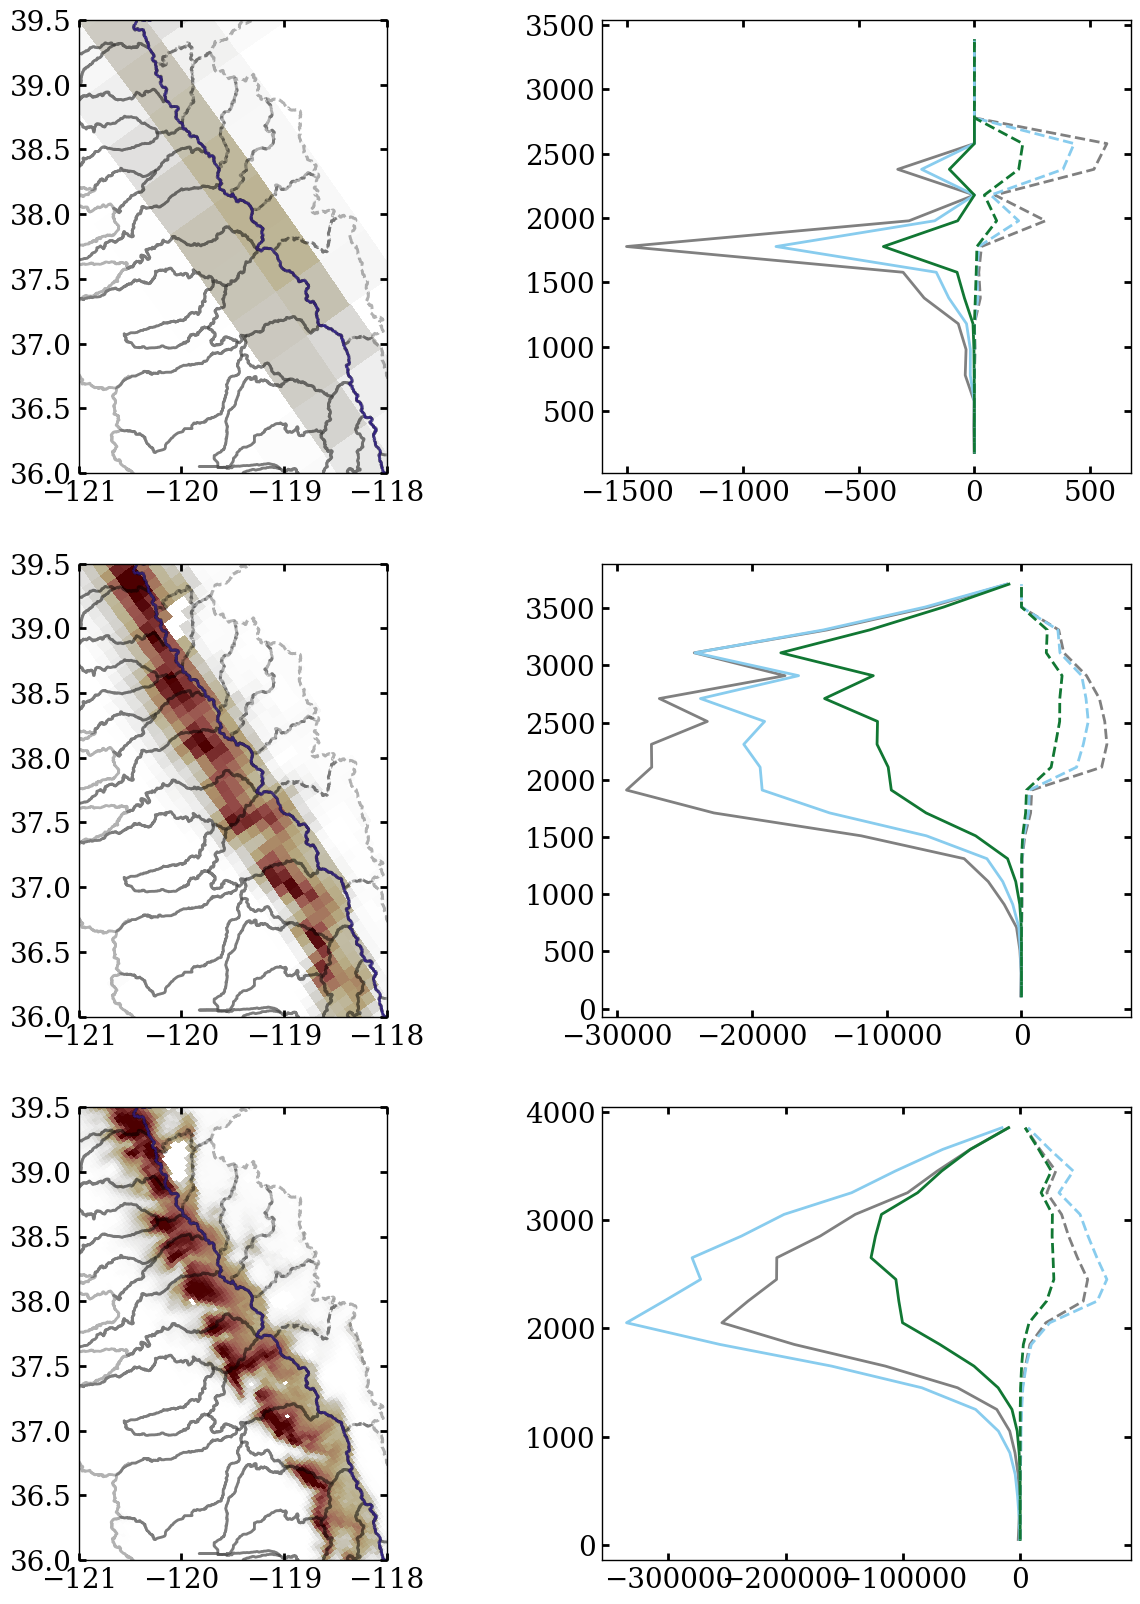

In [12]:
import cmcrameri.cm as ccm
fig,ax = plt.subplots(3,2, figsize = (15,20))
axs = ax.flatten()
yrs = [0,6,10]
style = {'lee': '--',
         'wind': '-',
         'prec': 'darkblue',
         'temp': 'orchid'}
yrcolors = ["black", "#332288","#88CCEE","#44AA99","#117733",
            "#999933","#DDCC77","#CC6677","#882255","#AA4499","brown","#fd3c06","gray"]

yrcolors = ["gray", "#88CCEE","#117733" ]


k = 0
custom_xtick_labels = ['1','0','1']
xtick_locations = [-1, 0,1]


for domain in domains[0:3]:
    #axs[k+1].axvspan(0, 4, facecolor='lightgray', alpha=0.5)
    #axs[k+1].axvspan(-4, 0, facecolor='white', alpha=0.5)
    #axs[k+1].set_xlim((-1.1,1.1))
    #axs[k+1].set_ylim((1000,3900))
    #axs[k+1].set_xticks(xtick_locations, custom_xtick_labels)

    sidemasks = xr.open_dataset(f'masks_{domain}_sn.nc')
    sidenames = list(sidemasks.side.values)
    info = plot_info[domain]
    snow_elev = info['snow_elev']
    area = info['area']
    elev_bins = info['elev']
    coords = info['coords']
    lon_array = coords['XLONG'][0]
    lat_array = coords['XLAT'][0]
    swe = info['swe_mean']
    yrs = [0,6,10]
    cmap = ccm.bilbao_r # 'copper'
   
    for i, subregion in enumerate(sidenames):
        regmask = sidemasks.sel(side = subregion).basin_mask.values
        diff = np.nanmean(swe['snow'][-30:].where(regmask), axis = (0)) - np.nanmean(swe['snow'][0:30].where(regmask), axis = 0)
        axs[k].pcolormesh(lon_array, lat_array,diff, cmap = cmap, vmin = -700, vmax = 0)
        snowdata = snow_elev[subregion]
        axs[k].set_xlim((-121, -118))
        axs[k].set_ylim((36,39.5))
        for idx,yr in enumerate(yrs):
            data = (snowdata[yr]) 
            label = None
            if subregion == 'wind': 
                data = -data
                label = yr * 10  +1980
            axs[k+1].plot(data,   #/ np.abs(np.nanmax(np.abs(data))) , 
                    elev_bins[1:], linestyle =style[subregion], 
                    color = yrcolors[idx] ,label =  label)
    in_sn.loc[idx_lee].boundary.plot(ax=axs[k], color = 'k',linestyle = '--', alpha = 0.3)
    in_sn.loc[idx_wind].boundary.plot(ax=axs[k], color = 'k', alpha = 0.3)
    gdf_overlap.plot(ax=axs[k], color =  '#332288' )#'purple')

    k+=2
    
    
    

/glade/scratch/mcowherd/ipykernel_135511/1402135725.py:42: RuntimeWarning: Mean of empty slice
  diff = np.nanmean(swe['snow'][60:90].where(regmask), axis = (0)) - np.nanmean(swe['snow'][0:30].where(regmask), axis = 0)
/glade/scratch/mcowherd/ipykernel_135511/1402135725.py:42: RuntimeWarning: Mean of empty slice
  diff = np.nanmean(swe['snow'][60:90].where(regmask), axis = (0)) - np.nanmean(swe['snow'][0:30].where(regmask), axis = 0)
/glade/scratch/mcowherd/ipykernel_135511/1402135725.py:42: RuntimeWarning: Mean of empty slice
  diff = np.nanmean(swe['snow'][60:90].where(regmask), axis = (0)) - np.nanmean(swe['snow'][0:30].where(regmask), axis = 0)


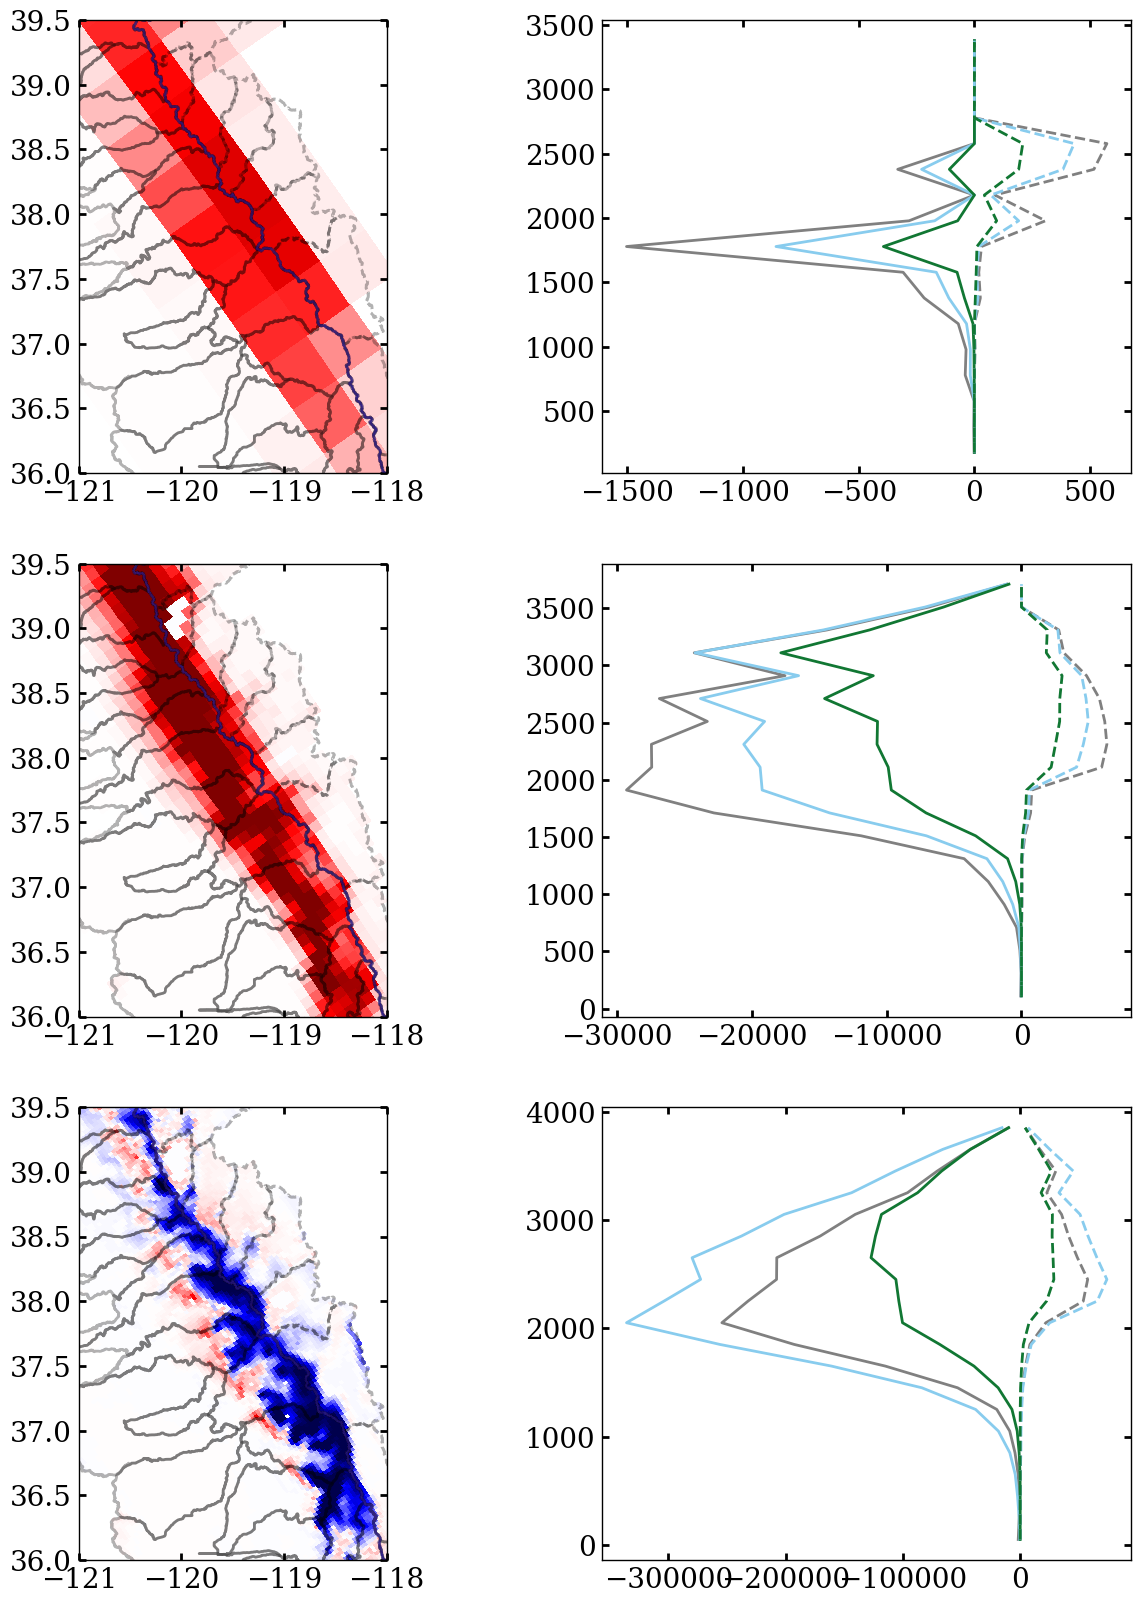

In [13]:
import cmcrameri.cm as ccm
fig,ax = plt.subplots(3,2, figsize = (15,20))
axs = ax.flatten()
yrs = [0,6,10]
style = {'lee': '--',
         'wind': '-',
         'prec': 'darkblue',
         'temp': 'orchid'}
yrcolors = ["black", "#332288","#88CCEE","#44AA99","#117733",
            "#999933","#DDCC77","#CC6677","#882255","#AA4499","brown","#fd3c06","gray"]

yrcolors = ["gray", "#88CCEE","#117733" ]


k = 0
custom_xtick_labels = ['1','0','1']
xtick_locations = [-1, 0,1]


for domain in domains[0:3]:
    #axs[k+1].axvspan(0, 4, facecolor='lightgray', alpha=0.5)
    #axs[k+1].axvspan(-4, 0, facecolor='white', alpha=0.5)
    #axs[k+1].set_xlim((-1.1,1.1))
    #axs[k+1].set_ylim((1000,3900))
    #axs[k+1].set_xticks(xtick_locations, custom_xtick_labels)

    sidemasks = xr.open_dataset(f'masks_{domain}_sn.nc')
    sidenames = list(sidemasks.side.values)
    info = plot_info[domain]
    snow_elev = info['snow_elev']
    area = info['area']
    elev_bins = info['elev']
    coords = info['coords']
    lon_array = coords['XLONG'][0]
    lat_array = coords['XLAT'][0]
    swe = info['swe_mean']
    yrs = [0,6,10]
    cmap = 'seismic_r' # 'copper'
   
    for i, subregion in enumerate(sidenames):
        regmask = sidemasks.sel(side = subregion).basin_mask.values
        diff = np.nanmean(swe['snow'][60:90].where(regmask), axis = (0)) - np.nanmean(swe['snow'][0:30].where(regmask), axis = 0)
        axs[k].pcolormesh(lon_array, lat_array,diff, cmap = cmap, vmin = -200, vmax = 200)
        snowdata = snow_elev[subregion]
        axs[k].set_xlim((-121, -118))
        axs[k].set_ylim((36,39.5))
        for idx,yr in enumerate(yrs):
            data = (snowdata[yr]) 
            label = None
            if subregion == 'wind': 
                data = -data
                label = yr * 10  +1980
            axs[k+1].plot(data,   #/ np.abs(np.nanmax(np.abs(data))) , 
                    elev_bins[1:], linestyle =style[subregion], 
                    color = yrcolors[idx] ,label =  label)
    in_sn.loc[idx_lee].boundary.plot(ax=axs[k], color = 'k',linestyle = '--', alpha = 0.3)
    in_sn.loc[idx_wind].boundary.plot(ax=axs[k], color = 'k', alpha = 0.3)
    gdf_overlap.plot(ax=axs[k], color =  '#332288' )#'purple')

    k+=2
    
    
    

/glade/scratch/mcowherd/ipykernel_135511/3130591962.py:43: RuntimeWarning: Mean of empty slice
  sdiff = np.nanmean(swe['snow'][60:90].where(regmask), axis = (0)) - np.nanmean(swe['snow'][0:30].where(regmask), axis = 0)
/glade/scratch/mcowherd/ipykernel_135511/3130591962.py:44: RuntimeWarning: Mean of empty slice
  tdiff = np.nanmean(t2['t2'][60:90].where(regmask), axis = (0)) - np.nanmean(t2['t2'][0:30].where(regmask), axis = 0)
/glade/scratch/mcowherd/ipykernel_135511/3130591962.py:43: RuntimeWarning: Mean of empty slice
  sdiff = np.nanmean(swe['snow'][60:90].where(regmask), axis = (0)) - np.nanmean(swe['snow'][0:30].where(regmask), axis = 0)
/glade/scratch/mcowherd/ipykernel_135511/3130591962.py:44: RuntimeWarning: Mean of empty slice
  tdiff = np.nanmean(t2['t2'][60:90].where(regmask), axis = (0)) - np.nanmean(t2['t2'][0:30].where(regmask), axis = 0)
/glade/scratch/mcowherd/ipykernel_135511/3130591962.py:43: RuntimeWarning: Mean of empty slice
  sdiff = np.nanmean(swe['snow'][60:9

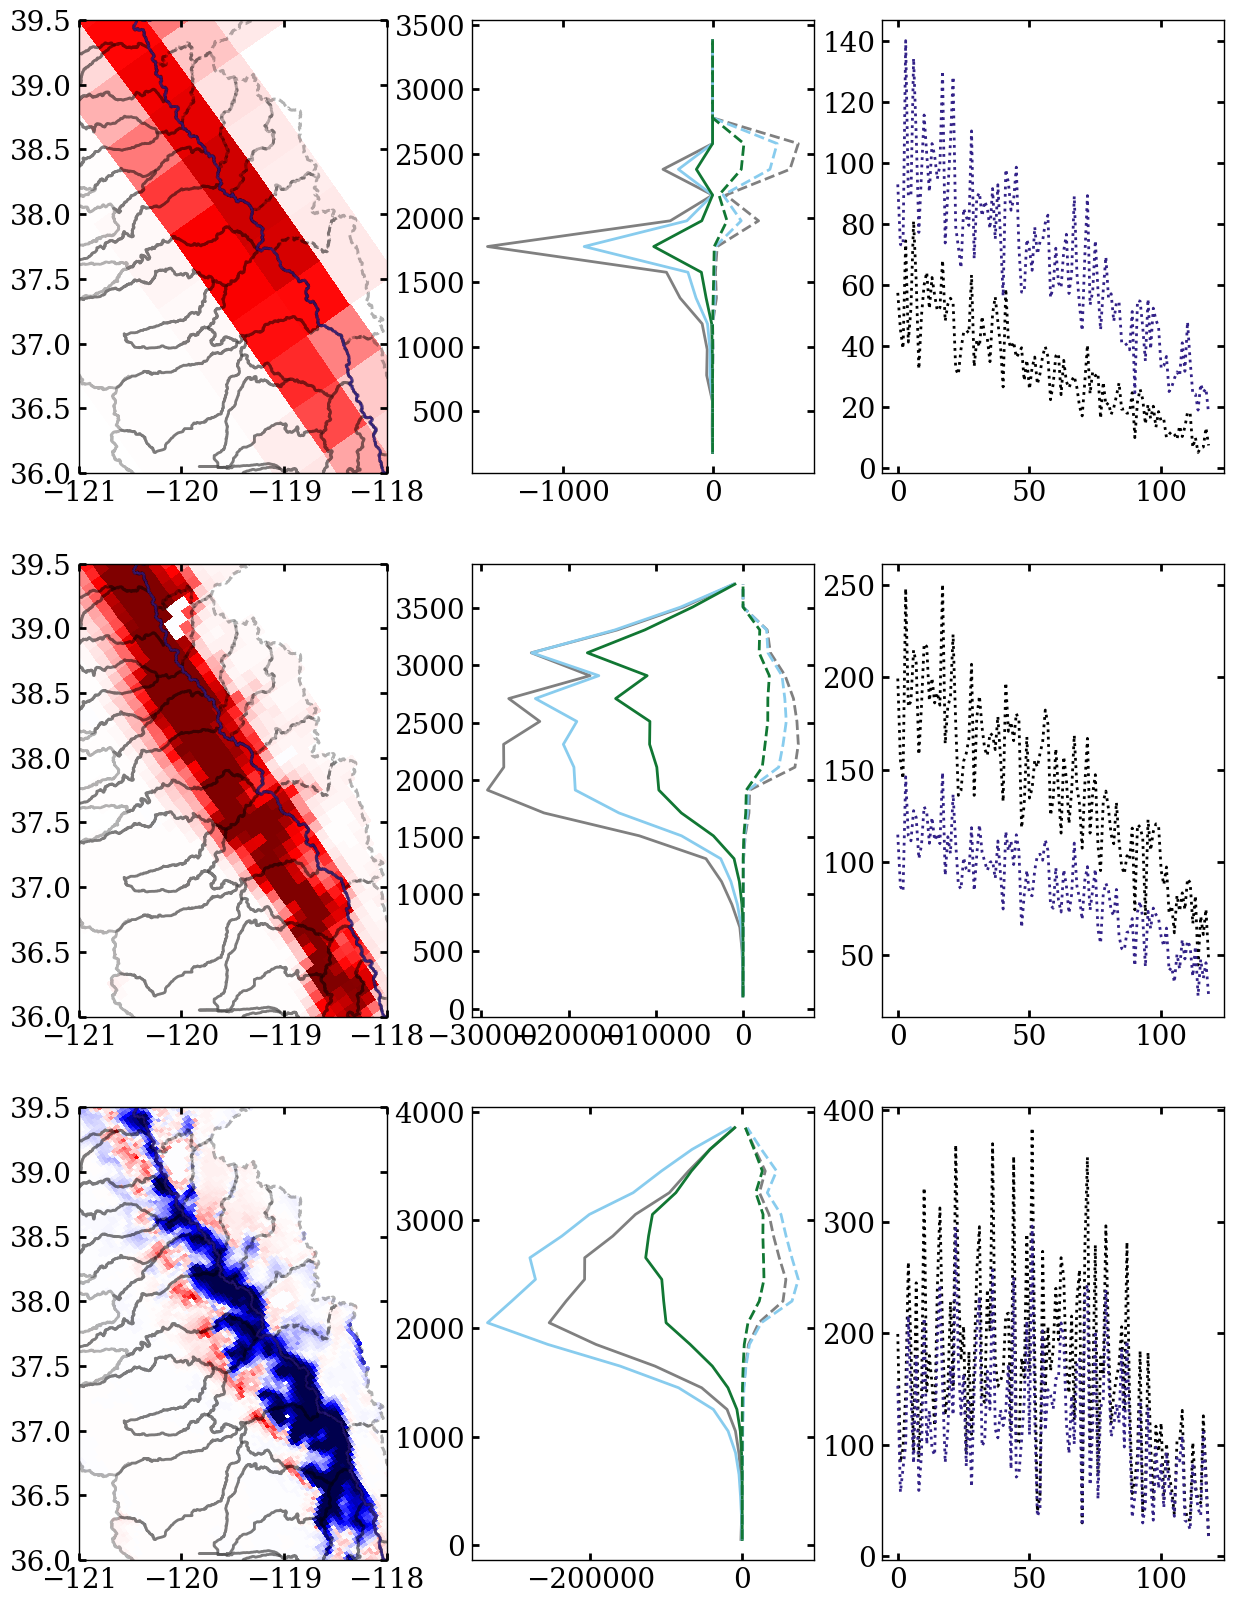

In [18]:
import cmcrameri.cm as ccm
fig,ax = plt.subplots(3,3, figsize = (15,20))
axs = ax.flatten()
yrs = [0,6,10]
style = {'lee': '--',
         'wind': '-',
         'prec': 'darkblue',
         'temp': 'orchid'}
yrcolors = ["black", "#332288","#88CCEE","#44AA99","#117733",
            "#999933","#DDCC77","#CC6677","#882255","#AA4499","brown","#fd3c06","gray"]

yrcolors = ["gray", "#88CCEE","#117733" ]


k = 0
custom_xtick_labels = ['1','0','1']
xtick_locations = [-1, 0,1]


for domain in domains[0:3]:
    #axs[k+1].axvspan(0, 4, facecolor='lightgray', alpha=0.5)
    #axs[k+1].axvspan(-4, 0, facecolor='white', alpha=0.5)
    #axs[k+1].set_xlim((-1.1,1.1))
    #axs[k+1].set_ylim((1000,3900))
    #axs[k+1].set_xticks(xtick_locations, custom_xtick_labels)

    sidemasks = xr.open_dataset(f'masks_{domain}_sn.nc')
    sidenames = list(sidemasks.side.values)
    info = plot_info[domain]
    snow_elev = info['snow_elev']
    area = info['area']
    elev_bins = info['elev']
    coords = info['coords']
    lon_array = coords['XLONG'][0]
    lat_array = coords['XLAT'][0]
    swe = info['swe_mean']
    t2 = info['t2_mean']
    yrs = [0,6,10]
    cmap = 'seismic_r' # 'copper'
   
    for i, subregion in enumerate(sidenames):
        regmask = sidemasks.sel(side = subregion).basin_mask.values
        sdiff = np.nanmean(swe['snow'][60:90].where(regmask), axis = (0)) - np.nanmean(swe['snow'][0:30].where(regmask), axis = 0)
        tdiff = np.nanmean(t2['t2'][60:90].where(regmask), axis = (0)) - np.nanmean(t2['t2'][0:30].where(regmask), axis = 0)
        diff = sdiff / tdiff
        axs[k].pcolormesh(lon_array, lat_array,diff, cmap = cmap , vmin = -0.05, vmax = 0.05)
        snowdata = snow_elev[subregion]
        axs[k].set_xlim((-121, -118))
        axs[k].set_ylim((36,39.5))
        for idx,yr in enumerate(yrs):
            data = (snowdata[yr]) 
            label = None
            if subregion == 'wind': 
                data = -data
                label = yr * 10  +1980
            axs[k+1].plot(data,   #/ np.abs(np.nanmax(np.abs(data))) , 
                    elev_bins[1:], linestyle =style[subregion], 
                    color = yrcolors[idx] ,label =  label)
        #axs[k+2].plot(np.nanmean(t2['t2'][1:-1].where(regmask), axis = (1,2)), '-')
        axs[k+2].plot(np.nanmean(swe['snow'][1:-1].where(regmask), axis = (1,2)),':')
    in_sn.loc[idx_lee].boundary.plot(ax=axs[k], color = 'k',linestyle = '--', alpha = 0.3)
    in_sn.loc[idx_wind].boundary.plot(ax=axs[k], color = 'k', alpha = 0.3)
    gdf_overlap.plot(ax=axs[k], color =  '#332288' )#'purple')

    k+=3
    
    
    

In [66]:
1980 + 60

2040

In [ ]:
import cmcrameri.cm as ccm
fig,ax = plt.subplots(3,2, figsize = (15,20))
axs = ax.flatten()
yrs = [0,6,10]
style = {'lee': '--',
         'wind': '-',
         'prec': 'darkblue',
         'temp': 'orchid'}
yrcolors = ["black", "#332288","#88CCEE","#44AA99","#117733",
            "#999933","#DDCC77","#CC6677","#882255","#AA4499","brown","#fd3c06","gray"]

# yrcolors = ["gray", "#88CCEE","#117733" ]


k = 0
custom_xtick_labels = ['1','0','1']
xtick_locations = [-1, 0,1]


for domain in domains[0:3]:
    sidemasks = xr.open_dataset(f'masks_{domain}_sn.nc')
    sidenames = list(sidemasks.side.values)
    info = plot_info[domain]
    snow_elev = info['snow_elev']
    area = info['area']
    elev_bins = info['elev']
    coords = info['coords']
    lon_array = coords['XLONG'][0]
    lat_array = coords['XLAT'][0]
    swe = info['swe_mean']
    yrs = [0,1,2,3,4,5,6,7,8,9,10]
    cmap = ccm.bilbao_r # 'copper'
   
    for i, subregion in enumerate(sidenames):
        regmask = sidemasks.sel(side = subregion).basin_mask.values
        tmp = swe['snow'].where(regmask)
        tmp.data[tmp.data < 5] = np.nan
        axs[k].plot(np.roll(np.nanmean(tmp, axis = (1,2)),10)[10:], linestyle = style[subregion])
        snowdata = snow_elev[subregion]
        for idx,yr in enumerate(yrs):
            data = (snowdata[yr]) 
            label = None
            if subregion == 'wind': 
                data = -data
                label = yr * 10  +1980
            axs[k+1].plot(data,   #/ np.abs(np.nanmax(np.abs(data))) , 
                    elev_bins[1:], linestyle =style[subregion], 
                    color = yrcolors[idx] ,label =  label)

    k+=2
    
    
    

/glade/scratch/mcowherd/ipykernel_129057/1435791175.py:65: RuntimeWarning: Mean of empty slice
  tdiff = np.nanmean(myt2['t2'][-30:-2].where(regmask), axis = (0)) - np.nanmean(myt2['t2'][2:32].where(regmask), axis = 0)
/glade/scratch/mcowherd/ipykernel_129057/1435791175.py:66: RuntimeWarning: Mean of empty slice
  sdiff = np.nanmean(myswe['snow'][-30:-2].where(regmask), axis = (0)) - np.nanmean(myswe['snow'][2:32].where(regmask), axis = 0)
/glade/scratch/mcowherd/ipykernel_129057/1435791175.py:65: RuntimeWarning: Mean of empty slice
  tdiff = np.nanmean(myt2['t2'][-30:-2].where(regmask), axis = (0)) - np.nanmean(myt2['t2'][2:32].where(regmask), axis = 0)
/glade/scratch/mcowherd/ipykernel_129057/1435791175.py:66: RuntimeWarning: Mean of empty slice
  sdiff = np.nanmean(myswe['snow'][-30:-2].where(regmask), axis = (0)) - np.nanmean(myswe['snow'][2:32].where(regmask), axis = 0)
/glade/scratch/mcowherd/ipykernel_129057/1435791175.py:65: RuntimeWarning: Mean of empty slice
  tdiff = np.nanm

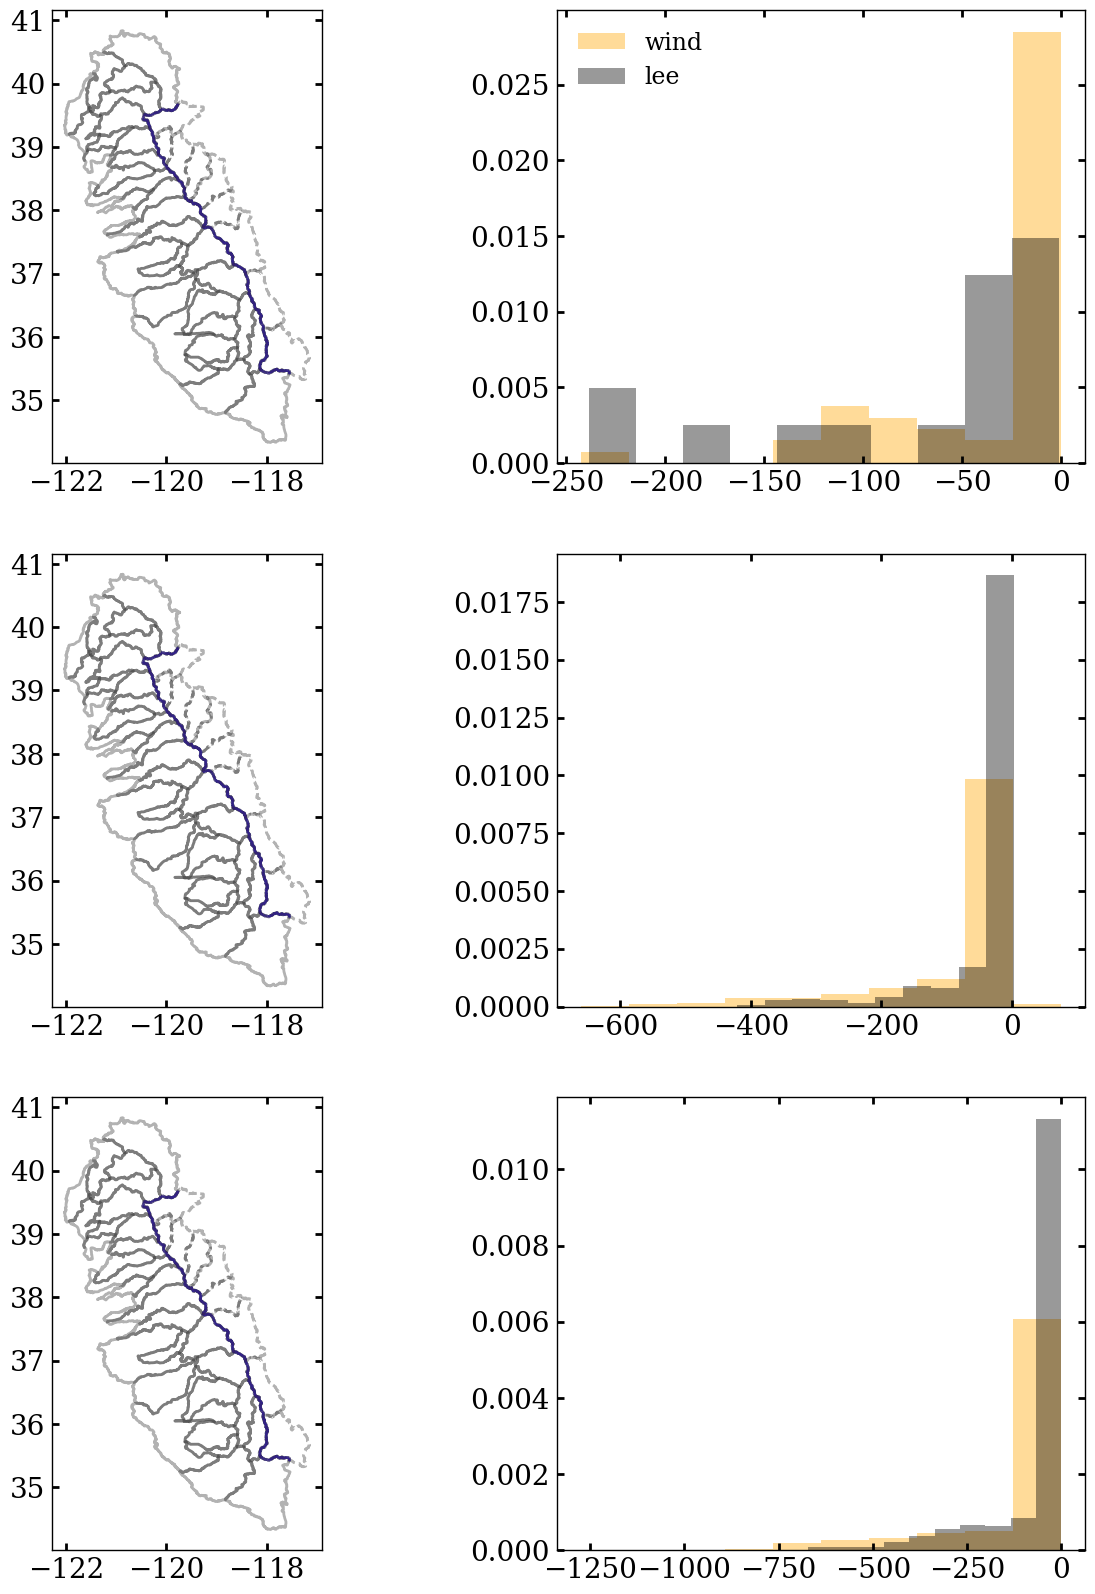

In [24]:
import cmcrameri.cm as ccm
fig,ax = plt.subplots(3,2, figsize = (15,20))
axs = ax.flatten()
yrs = [0,6,10]
style = {'lee': '--',
         'wind': '-',
         'prec': 'darkblue',
         'temp': 'orchid',
        'leehist': 'black',
        'windhist': 'orange'}
yrcolors = ["black", "#332288","#88CCEE","#44AA99","#117733",
            "#999933","#DDCC77","#CC6677","#882255","#AA4499","brown","#fd3c06","gray"]

yrcolors = ["gray", "#88CCEE","#117733" ]

def minmax(data):    
    min_val = np.nanmin(data.flatten())
    max_val = np.nanmax(data.flatten())
    range_val = max_val - min_val
    if range_val == 0:
        return np.zeros_like(data)
    
    normalized_data = (data - min_val) / range_val
    return normalized_data

k = 0
custom_xtick_labels = ['1','0','1']
xtick_locations = [-1, 0,1]

    
swe_data = {}
t2_data = {}


for domain in domains[0:3]:
    #axs[k+1].axvspan(0, 4, facecolor='lightgray', alpha=0.5)
    #axs[k+1].axvspan(-4, 0, facecolor='white', alpha=0.5)
    #axs[k+1].set_xlim((-1.1,1.1))
    #axs[k+1].set_ylim((1000,3900))
    #axs[k+1].set_xticks(xtick_locations, custom_xtick_labels)
    swe_data[domain] = {}
    t2_data[domain] = {}
    sidemasks = xr.open_dataset(f'masks_{domain}_sn.nc')
    sidenames = list(sidemasks.side.values)
    info = plot_info[domain]
    snow_elev = info['snow_elev']
    area = info['area']
    elev_bins = info['elev']
    coords = info['coords']
    lon_array = coords['XLONG'][0]
    lat_array = coords['XLAT'][0]
    swe = info['swe']
    prec = info['prec']
    t2 = info['t2']
    yrs = [0,6,10]
    cmap = 'Blues' # 'copper'

    for i, subregion in enumerate(sidenames):
        regmask = sidemasks.sel(side = subregion).basin_mask.values
        stmp = []
        ttmp = []
        for gcm in swe['gcm'].data:
            myswe = swe.sel({'gcm': gcm})
            myt2 = t2.sel({'gcm': gcm})
            tdiff = np.nanmean(myt2['t2'][80:100].where(regmask), axis = (0)) - np.nanmean(myt2['t2'][2:32].where(regmask), axis = 0)
            sdiff = np.nanmean(myswe['snow'][80:100].where(regmask), axis = (0)) - np.nanmean(myswe['snow'][2:32].where(regmask), axis = 0)
            diff = sdiff/tdiff
            stmp.append(sdiff)
            ttmp.append(tdiff)
            #axs[k].pcolormesh(lon_array, lat_array,diff, cmap = cmap) # , vmin = 0, vmax = 10 ) # , vmin = -100, vmax = 100)
            #axs[k].set_xlim((-121, -118))
            #axs[k].set_ylim((36,39.5))
        swe_data[domain][subregion] = stmp
        t2_data[domain][subregion] = ttmp
        '''
        for idx,yr in enumerate(yrs):
            data = (snowdata[yr]) 
            label = None
            if subregion == 'wind': 
                data = -data
                label = yr * 10  +1980
            axs[k+1].plot(data / np.abs(np.nanmax(np.abs(data))) , 
                    elev_bins[1:], linestyle =style[subregion], 
                    color = yrcolors[idx] ,label =  label)
        '''
        #axs[k+1].pcolormesh(lon_array, lat_array, tdiff, vmin = 1500, vmax = 1700, cmap = 'seismic')
        axs[k+1].hist(sdiff.flatten(), alpha = 0.4, density = True, color = style[f'{subregion}hist'], label = subregion)
    #axs[k+1].set_xlim((-121, -118))
    #axs[k+1].set_ylim((36,39.5))
    in_sn.loc[idx_lee].boundary.plot(ax=axs[k], color = 'k',linestyle = '--', alpha = 0.3)
    in_sn.loc[idx_wind].boundary.plot(ax=axs[k], color = 'k', alpha = 0.3)
    gdf_overlap.plot(ax=axs[k], color =  '#332288' )#'purple')

    k+=2
    
axs[1].legend()
plt.show()

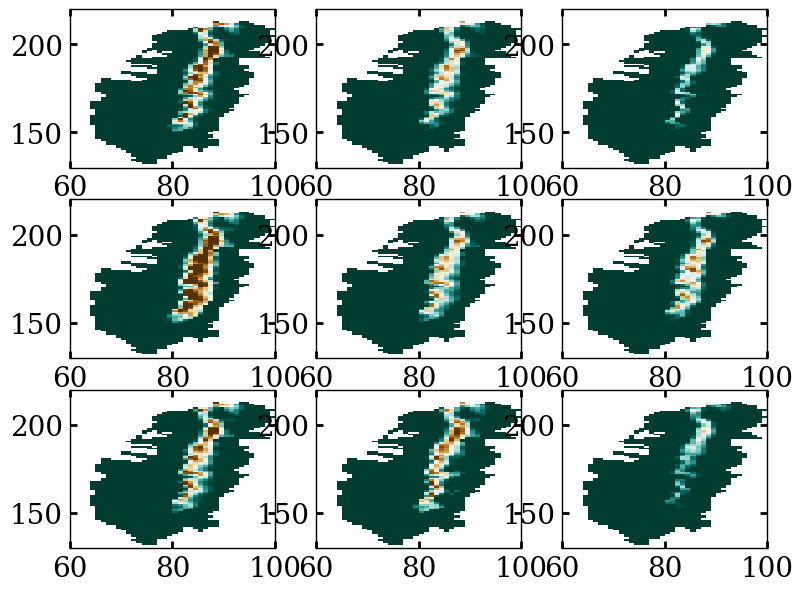

In [40]:
fig,ax = plt.subplots(3,3)
axs = ax.flatten()
domain = 'd02'
for i, subregion in enumerate(['lee','wind']):
    stmp = swe_data[domain][subregion]
    ttmp = t2_data[domain][subregion]
    for i in range(len(ttmp)):
        axs[i].pcolormesh(stmp[i]/ttmp[i], vmin = -0.5, vmax = -0.1, cmap = 'BrBG')
        axs[i].set_ylim((130,220))
        axs[i].set_xlim((60,100))
plt.show()
    
    

(array([  2.,  10.,  18.,  37.,  37.,  59.,  72., 121., 381., 623.]),
 array([-0.37441614, -0.33298281, -0.2915495 , -0.25011617, -0.20868285,
        -0.16724953, -0.12581621, -0.08438288, -0.04294956, -0.00151624,
         0.03991709]),
 <BarContainer object of 10 artists>)

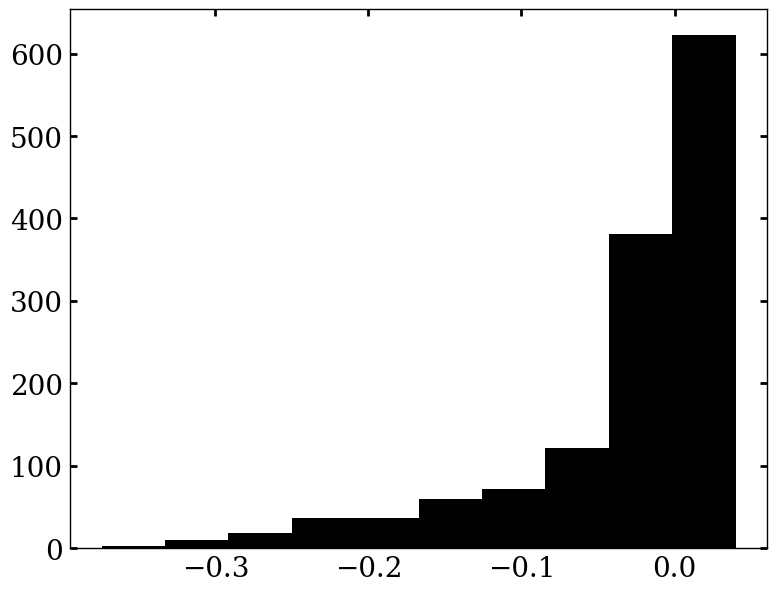

In [36]:
plt.hist((stmp[i]/ttmp[i]).flatten())

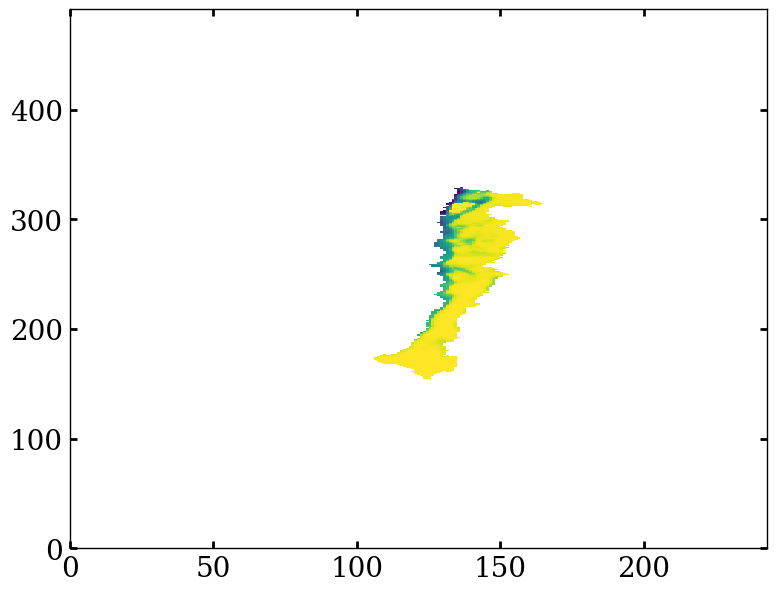

In [173]:
plt.pcolormesh(sdiff)

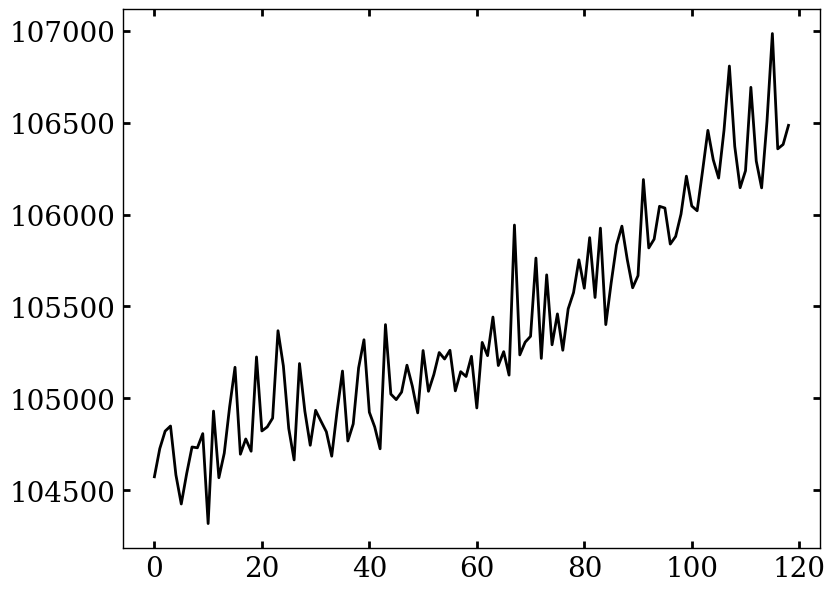

In [137]:
plt.plot(np.nanmean(t2['t2'], axis = (1,2))[1:-1])

In [134]:
tdiff[tdiff == 0] = np.nan

(array([ 11., 132., 543., 561., 855., 538., 241., 133.,  63.,  22.]),
 array([1452.6796875 , 1485.84143066, 1519.00317383, 1552.16479492,
        1585.32653809, 1618.48828125, 1651.65002441, 1684.81176758,
        1717.97338867, 1751.13513184, 1784.296875  ]),
 <BarContainer object of 10 artists>)

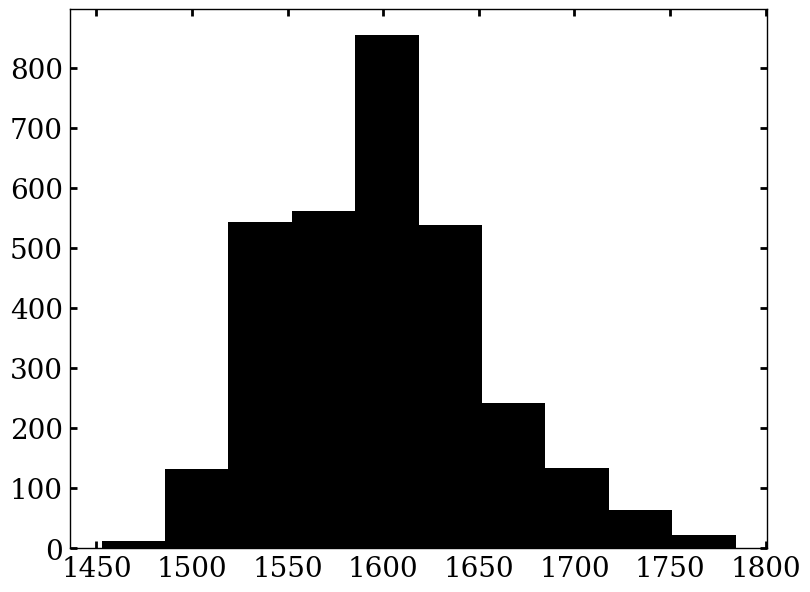

In [142]:
plt.hist(tdiff.flatten())

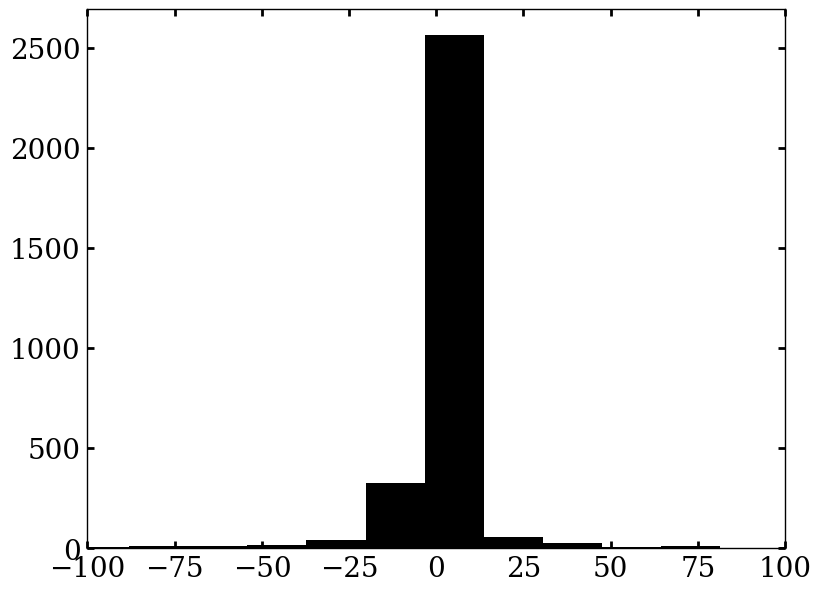

In [121]:
fig,ax=plt.subplots()
ax.hist(diff.flatten(), bins = 500)
ax.set_xlim((-100, 100))
plt.show()

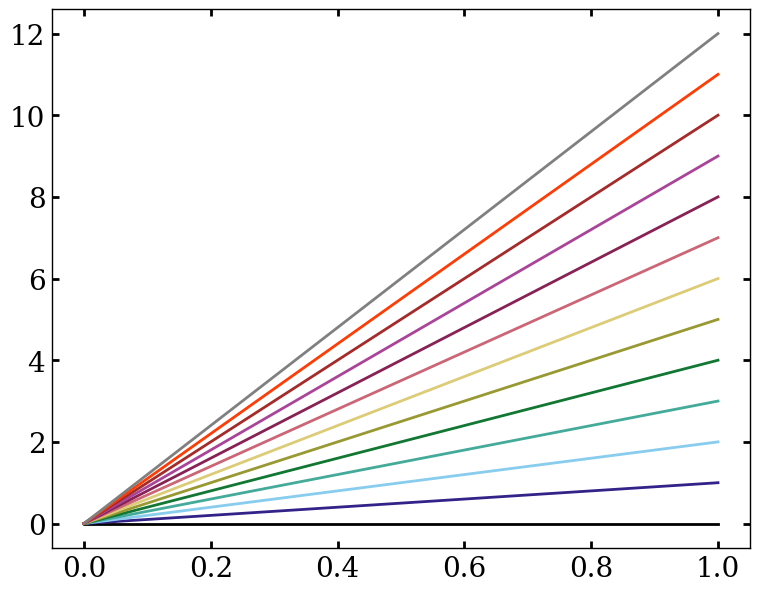

In [82]:
fig,ax = plt.subplots()
yrcolors = ["black", "#332288","#88CCEE","#44AA99","#117733",
            "#999933","#DDCC77","#CC6677","#882255","#AA4499","brown","#fd3c06","gray"]
for idx, color in enumerate(yrcolors):
    ax.plot([0,1],[0,idx], color = color)    
plt.show()


12

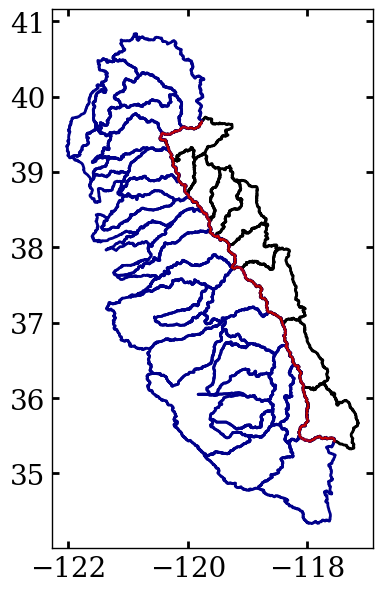

In [57]:
fig,ax = plt.subplots()
plt.show()